<a href="https://colab.research.google.com/github/Seifcha/Breast_Cancer_Detection/blob/main/FINALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Notebook - Breast Cancer Detection***

# I - Business Understanding

### **Problem Statement**

Hospitals and oncology centers face a constant flow of patients with suspicious tumors. Radiologists must manually review medical images and cellular measurements, a process that is often slow and highly dependent on individual expertise. In difficult or ambiguous cases, early signs of malignancy may be subtle and easily overlooked, increasing the risk of delayed intervention. As the number of incoming cases grows, medical teams struggle to quickly identify which patients need urgent attention. Without a fast and reliable decision-support system, benign cases consume valuable diagnostic time, while critical malignant tumors risk being detected too late. The lack of automated assistance directly impacts the efficiency of analysis, the accuracy of diagnoses, and the prioritization of treatment.

---

### **Business Objectives**

**BO1 – Analysis :**
Support clinicians during the initial analysis of tumor features by providing an intelligent tool that helps examine cellular characteristics quickly and consistently, reducing subjective variability.

**BO2 – Diagnosis :**
Improve diagnostic accuracy by offering a robust system capable of distinguishing benign from malignant tumors, especially in complex or borderline cases that traditionally require expert review.

**BO3 – Treatment :**
Assist medical teams in treatment prioritization by automatically assessing the level of suspicion for each patient, enabling faster triage and ensuring that high-risk cases are addressed first.

---

### **Data Science Objectives**

**DSO1** :
Develop a classification model that predicts whether a tumor is benign or malignant based on clinical and cellular features.

**DSO2** :
Design an Artificial Neural Network (ANN) capable of capturing complex and subtle patterns, with a specific focus on minimizing false negatives in challenging diagnostic cases.

**DSO3** :
Create a predictive model that assigns a patient-level risk score by analyzing combinations of tumor features, enhancing triage and aiding early therapeutic decisions.

# II - Data Understanding

## II - 1. Data Collection

**Import required libraries**

In [ ]:
!pip install gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
import gdown
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import load_breast_cancer

warnings.filterwarnings('ignore')

# Set visualization parameters
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


**Load the Wisconsin Diagnostic Breast Cancer dataset**

In [ ]:
url = "https://drive.google.com/uc?id=1uLvWoXvqsMSRtdVgunLzBET-LgCxmAMI"
gdown.download(url, "data.csv", quiet=False)
df = pd.read_csv("data.csv")

print("="*80)
print("INITIAL DATA COLLECTION REPORT")
print("="*80)
print(f"Dataset shape: {df.shape}")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")
print("="*80)

Downloading...
From: https://drive.google.com/uc?id=1uLvWoXvqsMSRtdVgunLzBET-LgCxmAMI
To: /content/data.csv
100%|██████████| 125k/125k [00:00<00:00, 37.2MB/s]

INITIAL DATA COLLECTION REPORT
Dataset shape: (569, 33)
Total samples: 569
Total features: 33


## II - 2. Data Description

**Display first and last rows to understand data structure**

In [ ]:
print("\n" + "="*80)
print("FIRST 10 ROWS OF THE DATASET")
print("="*80)
print(df.head(10))

print("\n" + "="*80)
print("LAST 5 ROWS OF THE DATASET")
print("="*80)
print(df.tail())


FIRST 10 ROWS OF THE DATASET
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840     

**Check column names and data types**

In [ ]:
print("\n" + "="*80)
print("DATASET STRUCTURE")
print("="*80)
print(f"\nColumn Names ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "-"*80)
print("Data Types Summary:")
print(df.dtypes.value_counts())

print("\n" + "-"*80)
print("Detailed Information:")
df.info()


DATASET STRUCTURE

Column Names (33 total):
 1. id
 2. diagnosis
 3. radius_mean
 4. texture_mean
 5. perimeter_mean
 6. area_mean
 7. smoothness_mean
 8. compactness_mean
 9. concavity_mean
10. concave points_mean
11. symmetry_mean
12. fractal_dimension_mean
13. radius_se
14. texture_se
15. perimeter_se
16. area_se
17. smoothness_se
18. compactness_se
19. concavity_se
20. concave points_se
21. symmetry_se
22. fractal_dimension_se
23. radius_worst
24. texture_worst
25. perimeter_worst
26. area_worst
27. smoothness_worst
28. compactness_worst
29. concavity_worst
30. concave points_worst
31. symmetry_worst
32. fractal_dimension_worst
33. Unnamed: 32

--------------------------------------------------------------------------------
Data Types Summary:
float64    31
int64       1
object      1
Name: count, dtype: int64

--------------------------------------------------------------------------------
Detailed Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 5

**Identify feature categories based on naming conventions**

In [ ]:
all_columns = df.columns.tolist()
feature_cols = [col for col in all_columns if col not in ['id', 'ID', 'diagnosis', 'Unnamed: 32']]

**Categorize by suffix patterns**

In [ ]:
mean_features = [col for col in feature_cols if 'mean' in col.lower()]
se_features = [col for col in feature_cols if 'se' in col.lower()]
worst_features = [col for col in feature_cols if 'worst' in col.lower()]
other_features = [col for col in feature_cols
                  if col not in mean_features + se_features + worst_features]

print(f"\nFeature Categories (based on naming patterns):")
print(f"  • Mean features:  {len(mean_features):2d} features")
print(f"  • SE features:    {len(se_features):2d} features")
print(f"  • Worst features: {len(worst_features):2d} features")
print(f"  • Other features: {len(other_features):2d} features")
print(f"  {'─'*40}")
print(f"  • Total features: {len(feature_cols):2d} features")

if mean_features:
    print(f"\nMean Features List:")
    for i, feat in enumerate(mean_features, 1):
        print(f"  {i:2d}. {feat}")


Feature Categories (based on naming patterns):
  • Mean features:  10 features
  • SE features:    10 features
  • Worst features: 10 features
  • Other features:  0 features
  ────────────────────────────────────────
  • Total features: 30 features

Mean Features List:
   1. radius_mean
   2. texture_mean
   3. perimeter_mean
   4. area_mean
   5. smoothness_mean
   6. compactness_mean
   7. concavity_mean
   8. concave points_mean
   9. symmetry_mean
  10. fractal_dimension_mean


**Select numeric columns only**

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric Features: {len(numeric_cols)}")
print("\nDescriptive Statistics:")
print(df[numeric_cols].describe())


Numeric Features: 32

Descriptive Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919  

**Target Variable Description**

In [ ]:
print("\nTarget Variable: 'diagnosis'")
print(f"  Data type: {df['diagnosis'].dtype}")
print(f"  Unique values: {df['diagnosis'].unique()}")
print(f"  Number of unique values: {df['diagnosis'].nunique()}")

print("\nValue Counts:")
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_percentages = df['diagnosis'].value_counts(normalize=True) * 100

for diag_value in diagnosis_counts.index:
    count = diagnosis_counts[diag_value]
    pct = diagnosis_percentages[diag_value]
    print(f"  • {diag_value}: {count:4d} samples ({pct:5.2f}%)")


Target Variable: 'diagnosis'
  Data type: object
  Unique values: ['M' 'B']
  Number of unique values: 2

Value Counts:
  • B:  357 samples (62.74%)
  • M:  212 samples (37.26%)


**Statistics by Target Class**

In [ ]:
for diag_class in sorted(df['diagnosis'].unique()):
    subset = df[df['diagnosis'] == diag_class]
    print(f"\n{'─'*80}")
    print(f"CLASS: {diag_class} (n={len(subset)} samples)")
    print(f"{'─'*80}")
    print(subset[numeric_cols].describe())


────────────────────────────────────────────────────────────────────────────────
CLASS: B (n=357 samples)
────────────────────────────────────────────────────────────────────────────────
                 id  radius_mean  texture_mean  perimeter_mean   area_mean  \
count  3.570000e+02   357.000000    357.000000      357.000000  357.000000   
mean   2.654382e+07    12.146524     17.914762       78.075406  462.790196   
std    1.167397e+08     1.780512      3.995125       11.807438  134.287118   
min    8.913000e+03     6.981000      9.710000       43.790000  143.500000   
25%    8.746620e+05    11.080000     15.150000       70.870000  378.200000   
50%    9.089160e+05    12.200000     17.390000       78.180000  458.400000   
75%    8.812816e+06    13.370000     19.760000       86.100000  551.100000   
max    9.113205e+08    17.850000     33.810000      114.600000  992.100000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       357.000000      

## II - 3. Data Exploration

**Prepare data for visualization**

In [ ]:
if 'B' in diagnosis_counts.index and 'M' in diagnosis_counts.index:
    labels_order = ['B', 'M']
    display_labels = ['Benign (B)', 'Malignant (M)']
    colors = ['#2ecc71', '#e74c3c']
    values = [diagnosis_counts['B'], diagnosis_counts['M']]
else:
    labels_order = diagnosis_counts.index.tolist()
    display_labels = labels_order
    colors = plt.cm.Set2(range(len(labels_order)))
    values = diagnosis_counts.values.tolist()

**Create visualization**

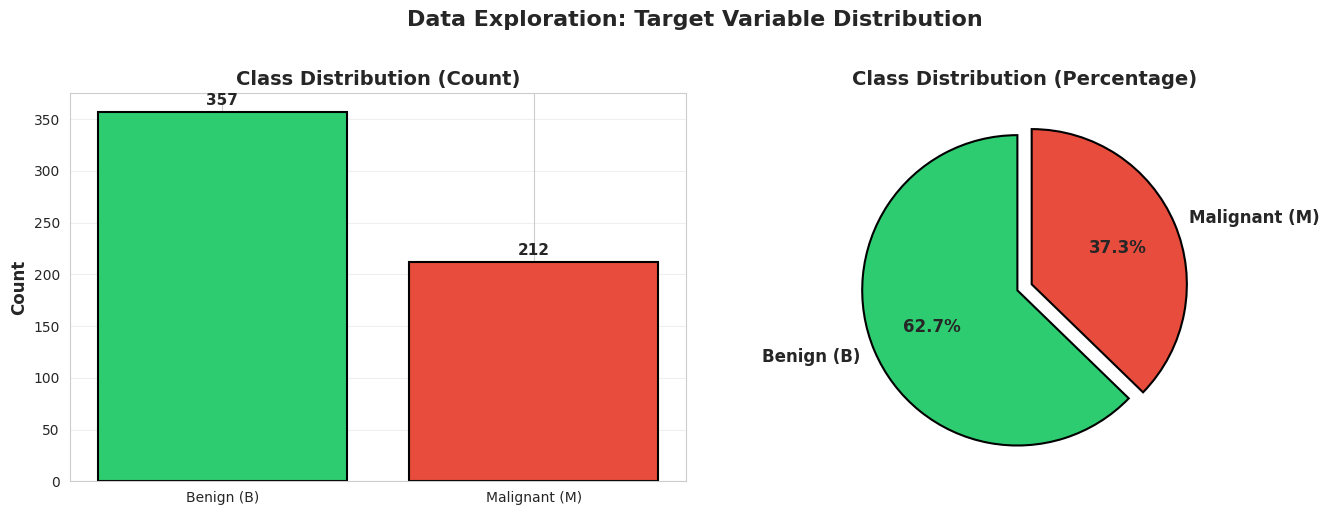

✓ Saved: 01_class_distribution.png


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
bars = axes[0].bar(display_labels, values, color=colors,
                   edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, v in zip(bars, values):
    axes[0].text(bar.get_x() + bar.get_width()/2, v + max(values)*0.01,
                str(v), ha='center', va='bottom',
                fontweight='bold', fontsize=11)

# Pie chart
explode = tuple([0.05] * len(values))
axes[1].pie(values, labels=display_labels, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=explode,
            textprops={'fontsize': 12, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.suptitle('Data Exploration: Target Variable Distribution',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 01_class_distribution.png")

**Feature Distribution Analysis**

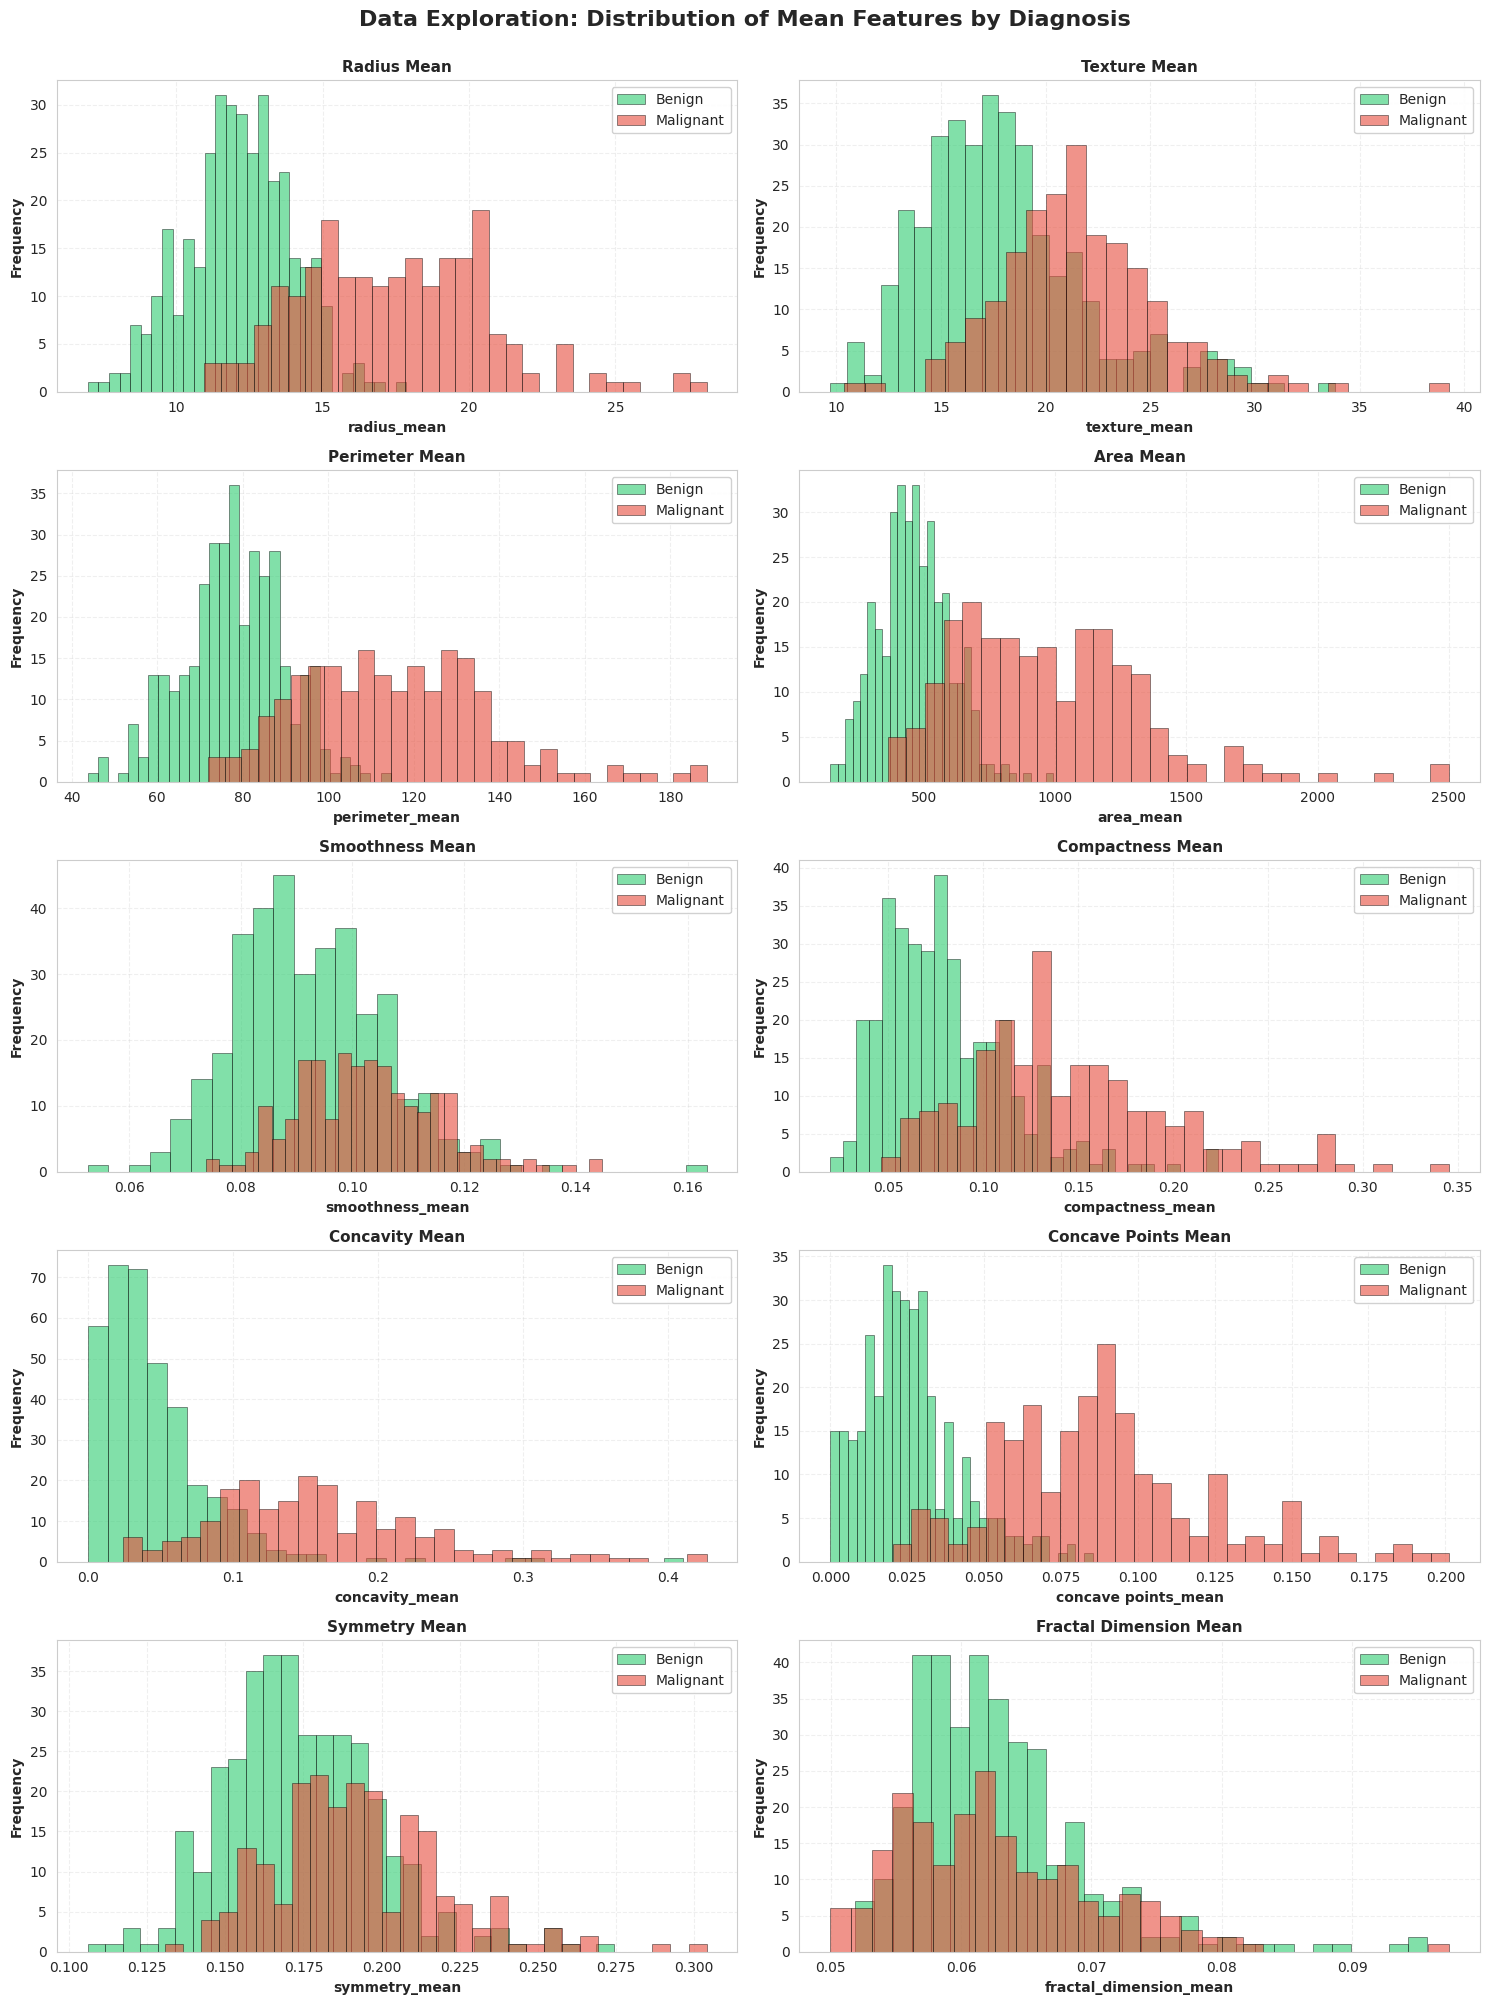

✓ Saved: 02_feature_distributions.png


In [ ]:
if mean_features:
    # Get unique diagnosis classes
    diag_classes = sorted(df['diagnosis'].unique())

    # Set up color mapping
    if set(diag_classes) == {'B', 'M'}:
        color_map = {'B': '#2ecc71', 'M': '#e74c3c'}
        label_map = {'B': 'Benign', 'M': 'Malignant'}
    else:
        color_map = {cls: plt.cm.Set2(i) for i, cls in enumerate(diag_classes)}
        label_map = {cls: str(cls) for cls in diag_classes}

    # Create subplots
    n_plots = len(mean_features)
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()

    for idx, col in enumerate(mean_features):
        for diag_class in diag_classes:
            subset_data = df[df['diagnosis'] == diag_class][col]
            axes[idx].hist(subset_data, bins=30, alpha=0.6,
                          label=label_map[diag_class],
                          color=color_map[diag_class],
                          edgecolor='black', linewidth=0.5)

        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'{col.replace("_", " ").title()}',
                           fontsize=11, fontweight='bold')
        axes[idx].legend(loc='upper right', framealpha=0.9)
        axes[idx].grid(True, alpha=0.3, linestyle='--')

    for idx in range(len(mean_features), len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Data Exploration: Distribution of Mean Features by Diagnosis',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('02_feature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Saved: 02_feature_distributions.png")
else:
    print("⚠ No mean features detected")

**Box Plots for Outlier Exploration**

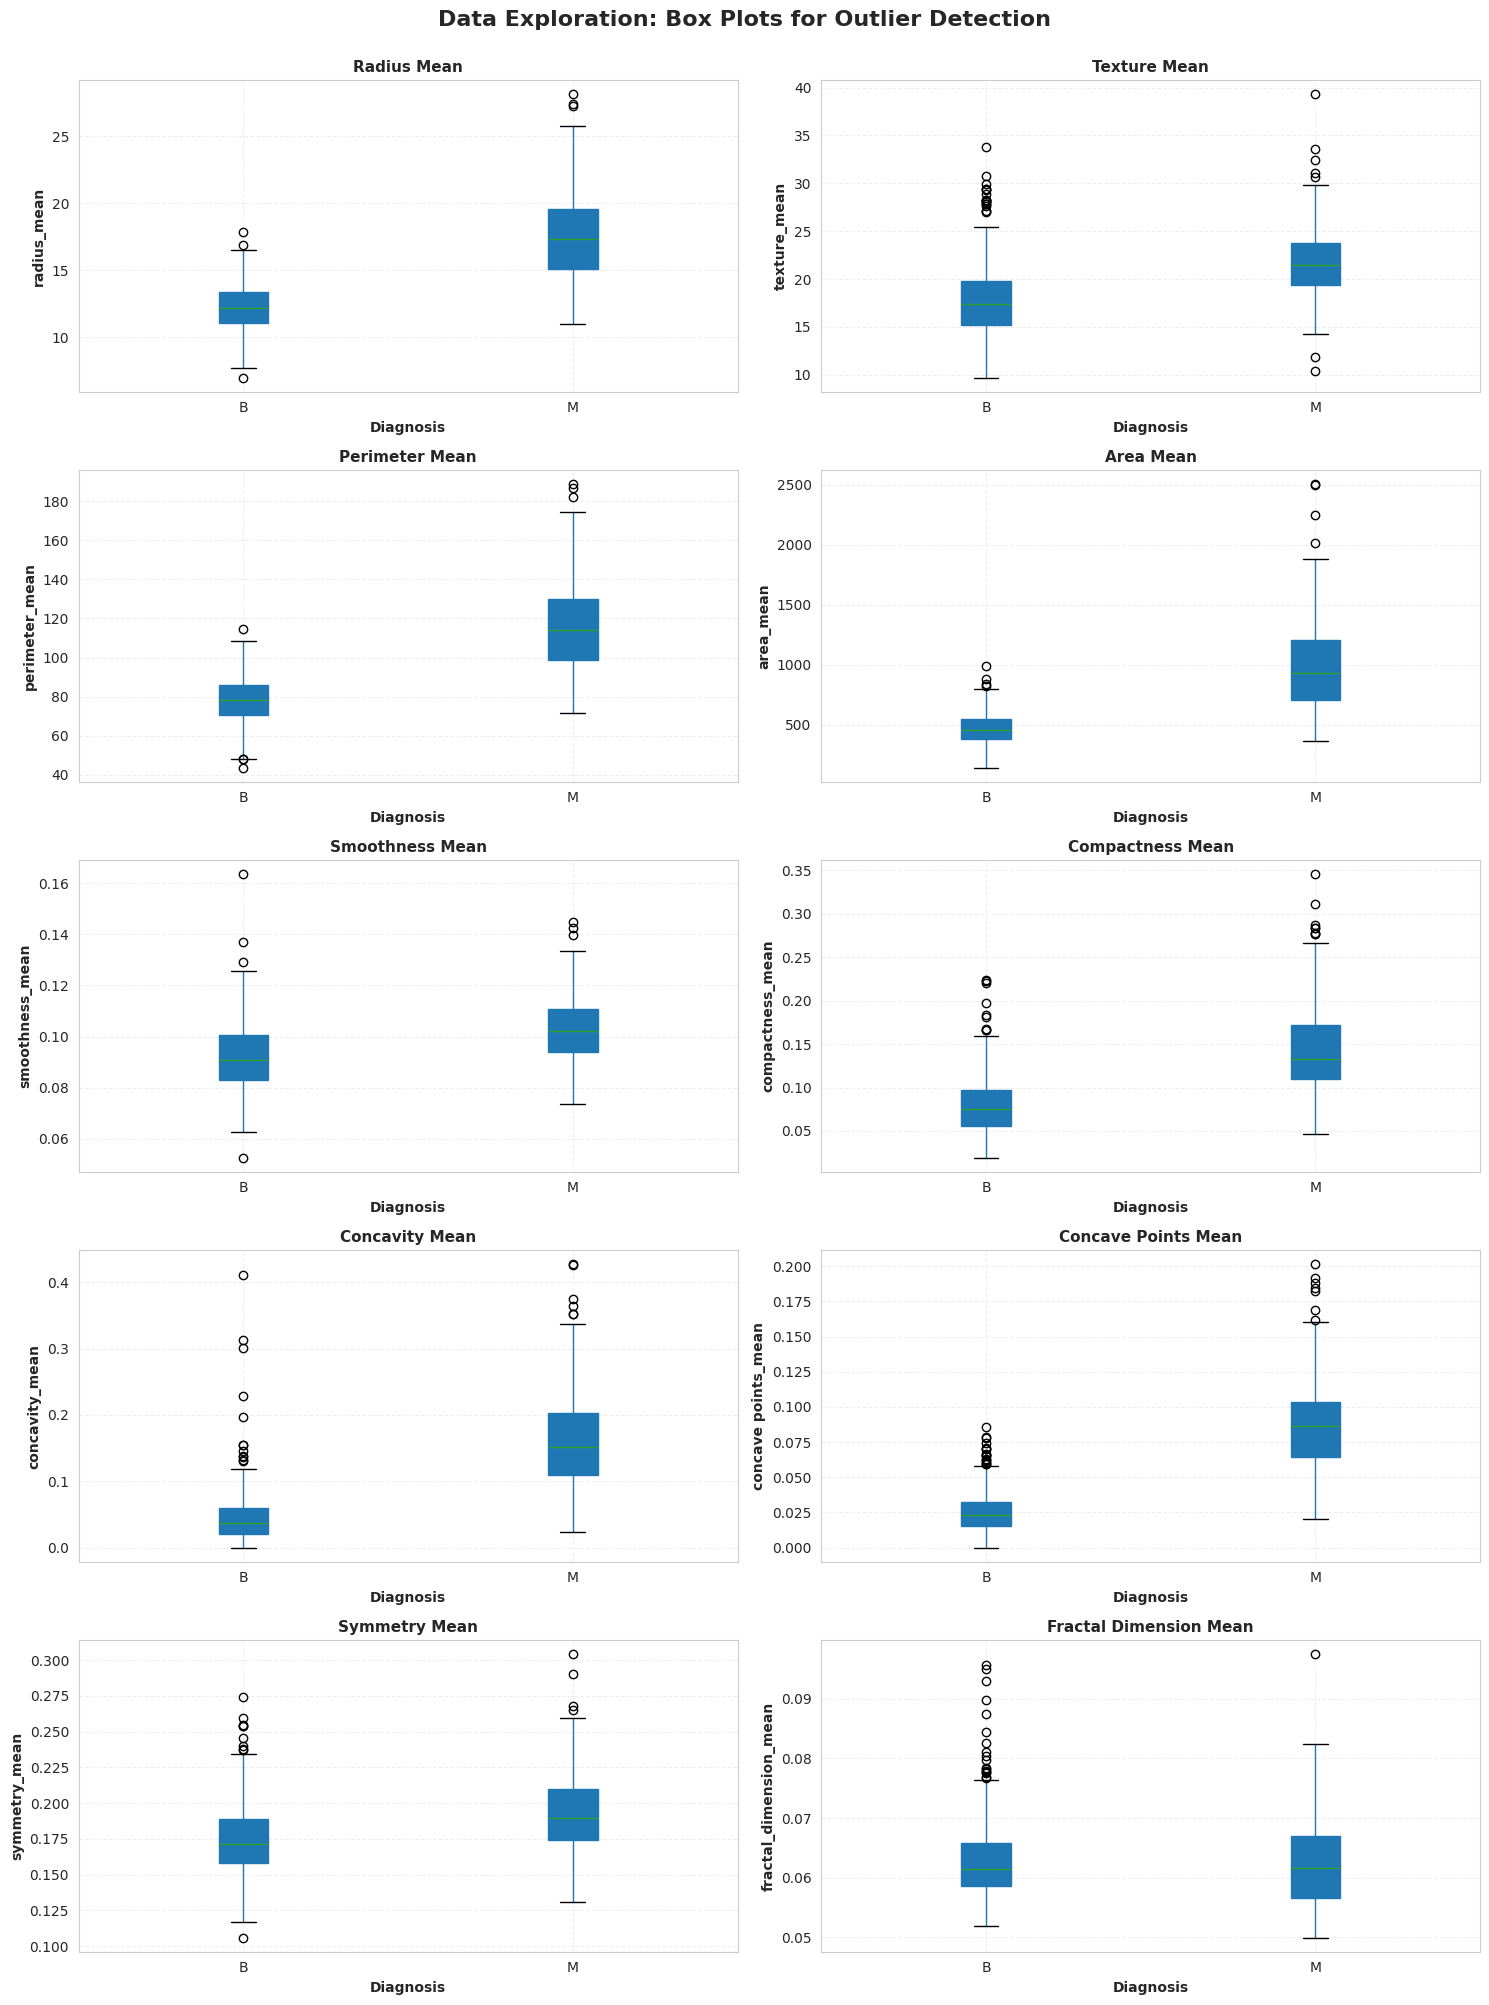

✓ Saved: 03_boxplots_outliers.png


In [ ]:
if mean_features:
    n_plots = len(mean_features)
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()

    for idx, col in enumerate(mean_features):
        df.boxplot(column=col, by='diagnosis', ax=axes[idx], patch_artist=True)

        axes[idx].set_xlabel('Diagnosis', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_title(f'{col.replace("_", " ").title()}',
                           fontsize=11, fontweight='bold')
        axes[idx].get_figure().suptitle('')
        axes[idx].grid(True, alpha=0.3, linestyle='--')

    for idx in range(len(mean_features), len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Data Exploration: Box Plots for Outlier Detection',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('03_boxplots_outliers.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Saved: 03_boxplots_outliers.png")
else:
    print("⚠ No mean features detected")

**Correlation Matrix - Feature Relationships**

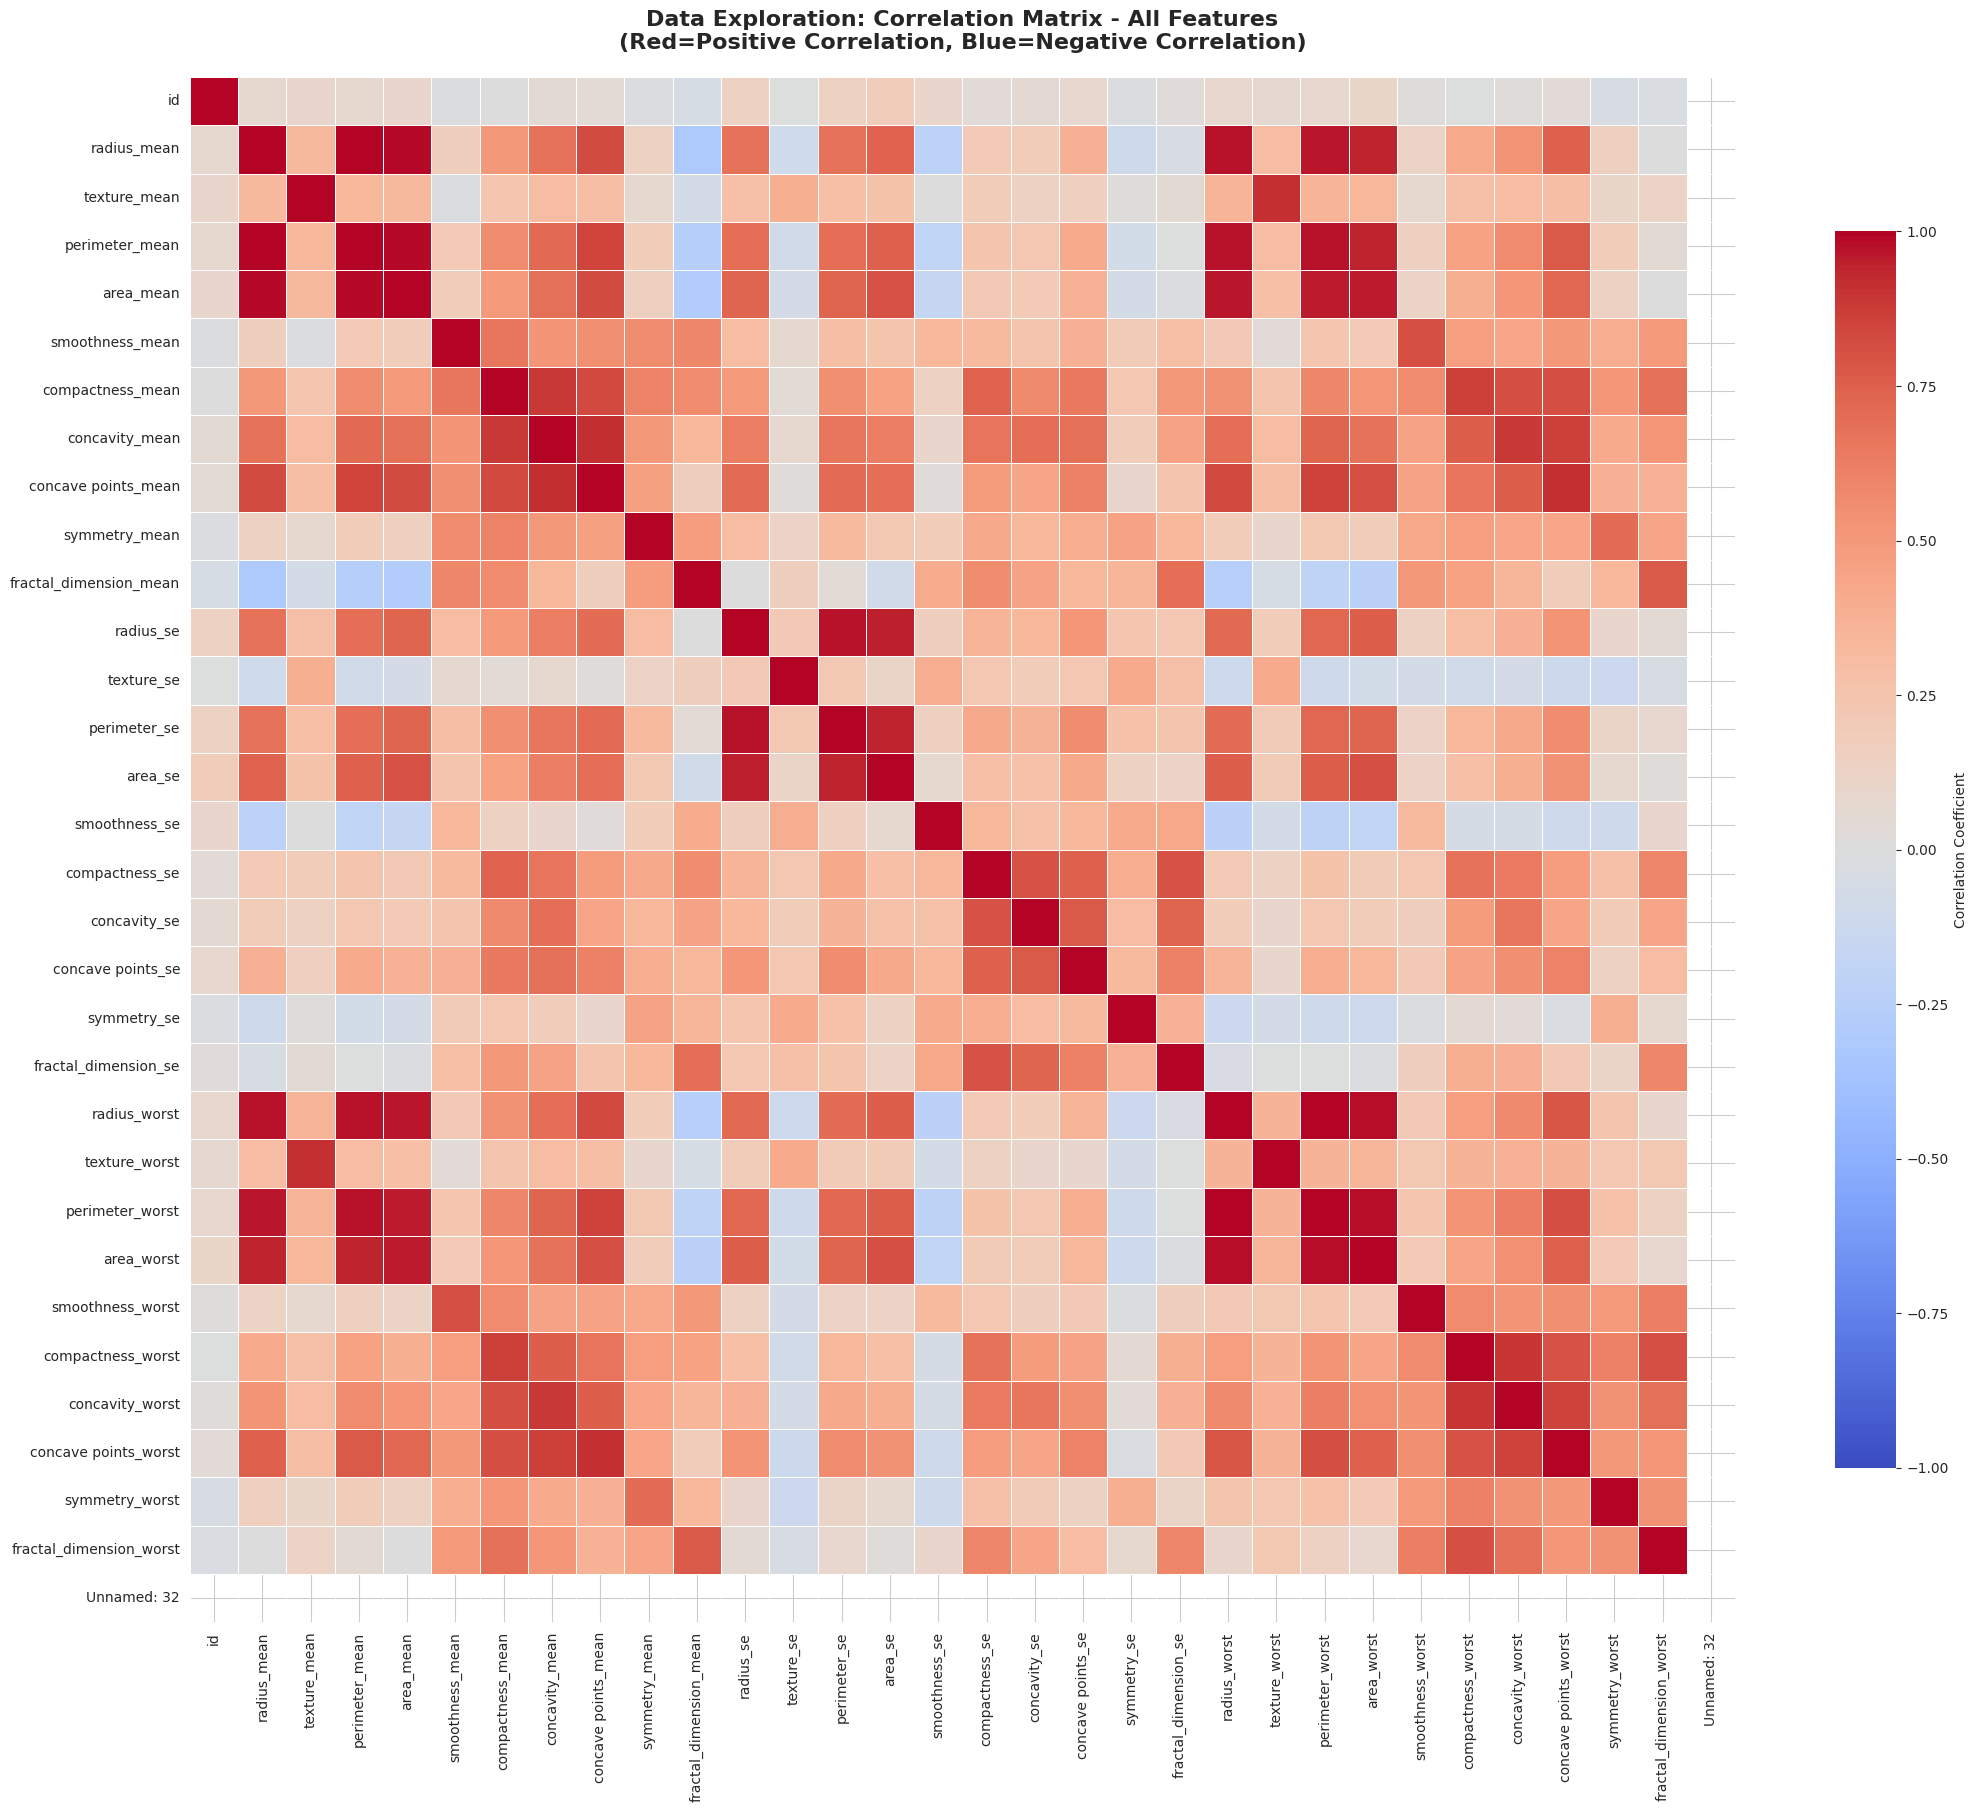

✓ Saved: 04_correlation_matrix.png

  Found 21 highly correlated pairs (|r| > 0.9)
  Top 5 highest correlations:
    1. radius_mean <-> perimeter_mean: 0.9979
    2. radius_worst <-> perimeter_worst: 0.9937
    3. radius_mean <-> area_mean: 0.9874
    4. perimeter_mean <-> area_mean: 0.9865
    5. radius_worst <-> area_worst: 0.9840


In [ ]:
numeric_features_only = df.select_dtypes(include=[np.number]).drop('diagnosis', axis=1, errors='ignore')

if len(numeric_features_only.columns) > 0:
    plt.figure(figsize=(22, 18))
    correlation_matrix = numeric_features_only.corr()

    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
                linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
                square=True, vmin=-1, vmax=1)

    plt.title('Data Exploration: Correlation Matrix - All Features\n(Red=Positive Correlation, Blue=Negative Correlation)',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('04_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Saved: 04_correlation_matrix.png")

    # Identify highly correlated pairs
    high_corr_threshold = 0.9
    high_corr_pairs = []

    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))

    if high_corr_pairs:
        print(f"\n  Found {len(high_corr_pairs)} highly correlated pairs (|r| > {high_corr_threshold})")
        print(f"  Top 5 highest correlations:")
        sorted_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)
        for i, (feat1, feat2, corr) in enumerate(sorted_pairs[:5], 1):
            print(f"    {i}. {feat1} <-> {feat2}: {corr:.4f}")
else:
    print("⚠ No numeric features for correlation analysis")

**Feature-Target Correlation Analysis**

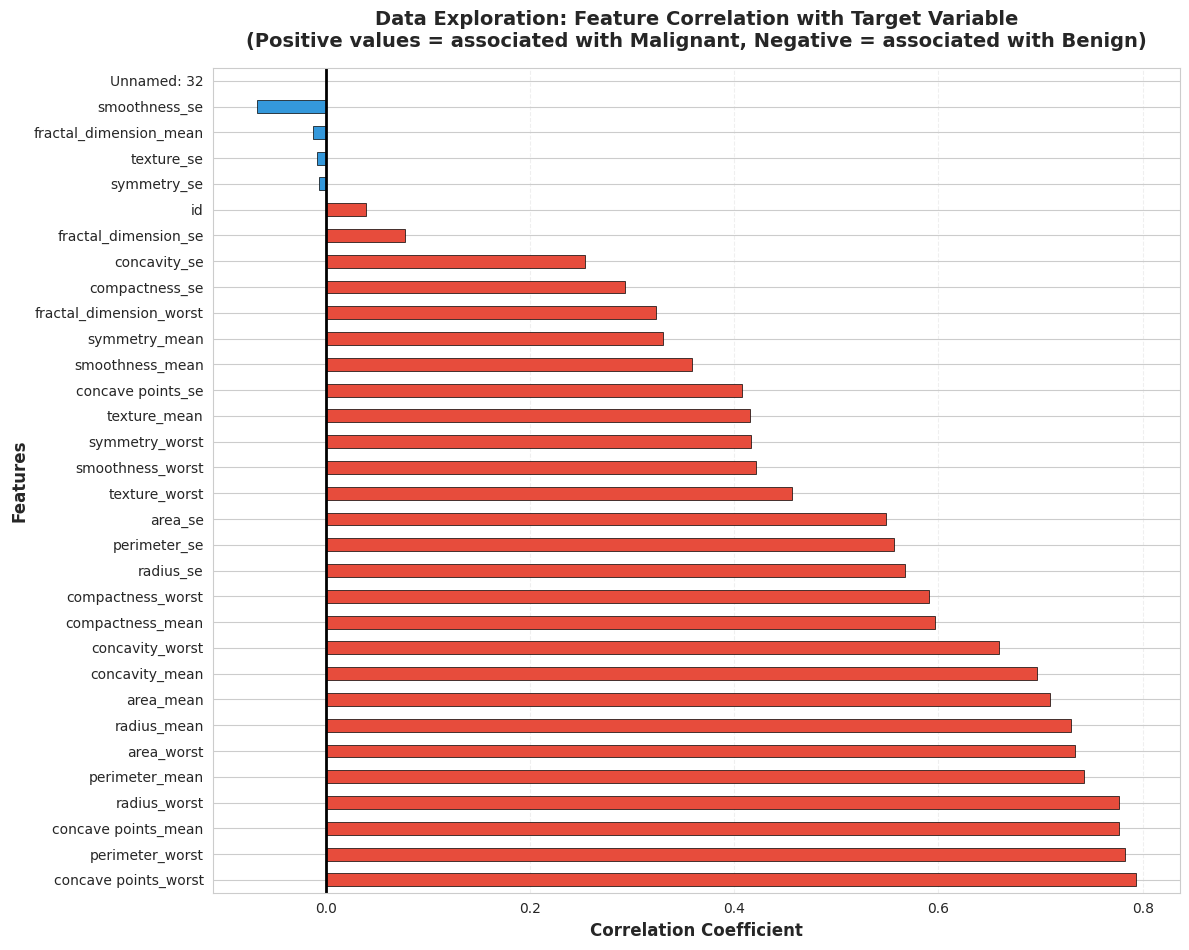

✓ Saved: 05_target_correlation.png

  Top 10 features most correlated with Malignant (M):
     1. concave points_worst                    :  0.7936
     2. perimeter_worst                         :  0.7829
     3. concave points_mean                     :  0.7766
     4. radius_worst                            :  0.7765
     5. perimeter_mean                          :  0.7426
     6. area_worst                              :  0.7338
     7. radius_mean                             :  0.7300
     8. area_mean                               :  0.7090
     9. concavity_mean                          :  0.6964
    10. concavity_worst                         :  0.6596

  Top 10 features most correlated with Benign (B):
     1. fractal_dimension_worst                 :  0.3239
     2. compactness_se                          :  0.2930
     3. concavity_se                            :  0.2537
     4. fractal_dimension_se                    :  0.0780
     5. id                                    

In [ ]:
if 'diagnosis' in df.columns:
    # Create a temporary numeric version for correlation analysis only
    # (We don't modify the original dataframe - that's for Data Preparation phase)
    df_temp = df.copy()

    # Encode diagnosis temporarily: M=1, B=0
    if df_temp['diagnosis'].dtype == 'object':
        df_temp['diagnosis'] = df_temp['diagnosis'].map({'M': 1, 'B': 0})

    # Calculate correlations with numeric diagnosis
    correlations_with_diagnosis = df_temp.corr()['diagnosis'].drop('diagnosis', errors='ignore').sort_values(ascending=False)

    if len(correlations_with_diagnosis) > 0:
        plt.figure(figsize=(12, max(8, len(correlations_with_diagnosis) * 0.3)))
        colors = ['#e74c3c' if x > 0 else '#3498db' for x in correlations_with_diagnosis.values]
        correlations_with_diagnosis.plot(kind='barh', color=colors,
                                         edgecolor='black', linewidth=0.5)

        plt.xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
        plt.ylabel('Features', fontsize=12, fontweight='bold')
        plt.title('Data Exploration: Feature Correlation with Target Variable\n(Positive values = associated with Malignant, Negative = associated with Benign)',
                  fontsize=14, fontweight='bold', pad=15)
        plt.axvline(x=0, color='black', linestyle='-', linewidth=2)
        plt.grid(True, alpha=0.3, axis='x', linestyle='--')
        plt.tight_layout()
        plt.savefig('05_target_correlation.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✓ Saved: 05_target_correlation.png")

        print(f"\n  Top 10 features most correlated with Malignant (M):")
        for i, (feat, corr) in enumerate(correlations_with_diagnosis.head(10).items(), 1):
            print(f"    {i:2d}. {feat:40s}: {corr:7.4f}")

        print(f"\n  Top 10 features most correlated with Benign (B):")
        for i, (feat, corr) in enumerate(correlations_with_diagnosis.tail(10).items(), 1):
            print(f"    {i:2d}. {feat:40s}: {corr:7.4f}")
    else:
        print("⚠ Unable to calculate correlations")
else:
    print("⚠ 'diagnosis' column not found")

**Scatter Plots - Feature Patterns**

In [ ]:
if mean_features:
    diag_classes = sorted(df['diagnosis'].unique())

    if set(diag_classes) == {'B', 'M'}:
        color_map = {'B': '#2ecc71', 'M': '#e74c3c'}
        label_map = {'B': 'Benign', 'M': 'Malignant'}
    else:
        color_map = {cls: plt.cm.Set2(i) for i, cls in enumerate(diag_classes)}
        label_map = {cls: str(cls) for cls in diag_classes}

    n_plots = len(mean_features)
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()

    for idx, col in enumerate(mean_features):
        for diag_class in diag_classes:
            subset = df[df['diagnosis'] == diag_class]
            axes[idx].scatter(subset[col], subset.index, alpha=0.5, s=15,
                            c=color_map[diag_class], label=label_map[diag_class],
                            edgecolors='none')

        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Sample Index', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'{col.replace("_", " ").title()}',
                           fontsize=11, fontweight='bold')
        axes[idx].legend(loc='upper right', framealpha=0.9, markerscale=1.5)
        axes[idx].grid(True, alpha=0.3, linestyle='--')

    for idx in range(len(mean_features), len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Data Exploration: Scatter Plots - Feature Patterns by Diagnosis',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('06_scatter_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Saved: 06_scatter_patterns.png")
else:
    print("⚠ No mean features detected")

## II - 4. Data Quality Verification

**Check for missing values**

In [ ]:
print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT - MISSING VALUES")
print("="*80)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("\n✓ No missing values found in the dataset")


DATA QUALITY ASSESSMENT - MISSING VALUES

Columns with missing values:
     Column  Missing_Count  Percentage
Unnamed: 32            569       100.0


**Check for duplicate rows**

In [ ]:
print("\n" + "-"*80)
print("Duplicate Records Check:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("⚠ Warning: Duplicate rows detected")
else:
    print("✓ No duplicate rows found")


--------------------------------------------------------------------------------
Duplicate Records Check:
Number of duplicate rows: 0
✓ No duplicate rows found


**Check for unique identifier (ID column)**

In [ ]:
if 'id' in df.columns or 'ID' in df.columns:
    id_col = 'id' if 'id' in df.columns else 'ID'
    print(f"\n✓ ID column found: '{id_col}'")
    print(f"  - Total IDs: {len(df[id_col])}")
    print(f"  - Unique IDs: {df[id_col].nunique()}")
    if len(df[id_col]) == df[id_col].nunique():
        print("  ✓ All IDs are unique (good for tracking)")


✓ ID column found: 'id'
  - Total IDs: 569
  - Unique IDs: 569
  ✓ All IDs are unique (good for tracking)


**All-NaN Columns Check**

In [ ]:
nan_cols = df.columns[df.isna().all()].tolist()
if nan_cols:
    print(f"\n⚠ Found {len(nan_cols)} column(s) with all NaN values:")
    for col in nan_cols:
        print(f"  • {col}")
    print("\n→ Action Required: These columns should be removed in Data Preparation")
else:
    print("\n✓ No columns with all NaN values")


⚠ Found 1 column(s) with all NaN values:
  • Unnamed: 32

→ Action Required: These columns should be removed in Data Preparation


**Data Type Consistency**

In [ ]:
print("\nData Type Distribution:")
dtype_summary = df.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"  • {str(dtype):15s}: {count:3d} column(s)")

# Check for mixed types in object columns
object_cols = df.select_dtypes(include='object').columns
if len(object_cols) > 0:
    print(f"\nObject columns detected: {len(object_cols)}")
    for col in object_cols:
        unique_types = df[col].dropna().apply(type).unique()
        print(f"  • {col}: {len(unique_types)} type(s)")
        if len(unique_types) > 1:
            print(f"    ⚠ Mixed types detected")
else:
    print("\n✓ No object columns - All numeric data")


Data Type Distribution:
  • float64        :  31 column(s)
  • int64          :   1 column(s)
  • object         :   1 column(s)

Object columns detected: 1
  • diagnosis: 1 type(s)


**Outlier Detection Summary**

In [ ]:
if len(numeric_cols) > 0:
    print("\nUsing IQR method to detect outliers:")
    print(f"{'Feature':<30s} {'Outliers':>10s} {'Percentage':>12s}")
    print("-"*80)

    total_outliers = 0
    outlier_features = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        n_outliers = len(outliers)
        pct_outliers = (n_outliers / len(df)) * 100

        if n_outliers > 0:
            print(f"{col:<30s} {n_outliers:>10d} {pct_outliers:>11.2f}%")
            total_outliers += n_outliers
            outlier_features.append(col)

    print("-"*80)
    print(f"\nSummary:")
    print(f"  • Features with outliers: {len(outlier_features)}/{len(numeric_cols)}")
    print(f"  • Total outlier instances: {total_outliers}")

    if len(outlier_features) > 0:
        print("\n→ Action Required: Review outliers in Data Preparation")
        print("  Consider: removal, transformation, or keeping for medical relevance")
    else:
        print("\n✓ No significant outliers detected")
else:
    print("\n⚠ No numeric columns for outlier detection")


Using IQR method to detect outliers:
Feature                          Outliers   Percentage
--------------------------------------------------------------------------------
id                                     81       14.24%
radius_mean                            14        2.46%
texture_mean                            7        1.23%
perimeter_mean                         13        2.28%
area_mean                              25        4.39%
smoothness_mean                         6        1.05%
compactness_mean                       16        2.81%
concavity_mean                         18        3.16%
concave points_mean                    10        1.76%
symmetry_mean                          15        2.64%
fractal_dimension_mean                 15        2.64%
radius_se                              38        6.68%
texture_se                             20        3.51%
perimeter_se                           38        6.68%
area_se                                65       11.42%
s

**Class Balance Verification**

In [ ]:
if 'diagnosis' in df.columns:
    print("\nTarget Variable Balance:")
    for diag_class in sorted(df['diagnosis'].unique()):
        count = (df['diagnosis'] == diag_class).sum()
        pct = (count / len(df)) * 100
        print(f"  • Class '{diag_class}': {count:4d} samples ({pct:5.2f}%)")

    if len(diagnosis_counts) == 2:
        imbalance_ratio = diagnosis_counts.max() / diagnosis_counts.min()
        print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

        if imbalance_ratio > 3:
            print("⚠ Significant class imbalance detected")
            print("→ Action Required: Consider resampling techniques in Data Preparation")
        elif imbalance_ratio > 1.5:
            print("⚠ Moderate class imbalance detected")
            print("→ Recommendation: Monitor model performance per class")
        else:
            print("✓ Classes are well balanced - No action needed")
else:
    print("\n⚠ Target variable not found")

# III - Data Preparation

**Make a copy**

In [ ]:
df_prep = df.copy()

**Remove identifier and useless columns**

In [ ]:
cols_to_drop = []
for candidate in ['id', 'ID', 'Unnamed: 32']:
    if candidate in df_prep.columns:
        cols_to_drop.append(candidate)

if cols_to_drop:
    df_prep.drop(columns=cols_to_drop, inplace=True)
    print(f"• Dropped identifier/unused columns: {cols_to_drop}")
else:
    print("• No identifier / unused columns found to drop")

**Drop columns with all NaN**

In [ ]:
all_nan_cols = df_prep.columns[df_prep.isna().all()].tolist()
if all_nan_cols:
    df_prep.drop(columns=all_nan_cols, inplace=True)
    print(f"• Dropped all-NaN columns: {all_nan_cols}")
else:
    print("• No columns with all values NaN to drop.")

**Remove duplicate rows (keep first)**

In [ ]:
n_duplicates_before = df_prep.duplicated().sum()
if n_duplicates_before > 0:
    df_prep = df_prep.drop_duplicates().reset_index(drop=True)
    print(f"• Dropped {n_duplicates_before} duplicate rows")
else:
    print("• No duplicate rows to drop")

**Encode target: keep simple (M=1, B=0)**

In [ ]:
if 'diagnosis' in df_prep.columns:
    if df_prep['diagnosis'].dtype == 'object' or df_prep['diagnosis'].dtype.name == 'category':
        df_prep['diagnosis'] = df_prep['diagnosis'].map({'M': 1, 'B': 0})
        print("• Encoded 'diagnosis' as binary: M=1, B=0")
    else:
        print("• 'diagnosis' already numeric")
else:
    raise ValueError("Target column 'diagnosis' not found in dataframe")

**Final feature/target separation**

In [ ]:
X = df_prep.drop(columns=['diagnosis'])
y = df_prep['diagnosis']

print(f"• Final dataset shape: X={X.shape}, y={y.shape}")

**Train-test split (stratified to keep class balance), simple CRISP-DM split: 80% train / 20% test**

In [ ]:
RANDOM_STATE = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=RANDOM_STATE
)

print(f"• Train/Test split: X_train={X_train.shape}, X_test={X_test.shape}")

**Handle missing values with KNN imputation**

In [ ]:
# Identification des colonnes numériques
numeric_cols_prep = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Vérification des manquants dans le Train
n_missing_train = X_train[numeric_cols_prep].isnull().sum().sum()

if n_missing_train > 0:
    print(f"• KNN imputation for {n_missing_train} missing numeric values (Fit on Train)...")
    imputer = KNNImputer(n_neighbors=5, weights='distance')

    # Fit sur Train, Transform sur Train et Test
    X_train[numeric_cols_prep] = imputer.fit_transform(X_train[numeric_cols_prep])
    X_test[numeric_cols_prep] = imputer.transform(X_test[numeric_cols_prep])

    print("  → KNN imputation completed.")
else:
    print("• No missing numeric values to impute with KNN.")

**Remove zero-variance features (if any)**

In [ ]:
zero_var_cols = []
# Détection basée sur X_train uniquement
for col in X_train.columns:
    if X_train[col].nunique() <= 1:
        zero_var_cols.append(col)

if zero_var_cols:
    # Suppression dans les deux sets
    X_train.drop(columns=zero_var_cols, inplace=True)
    X_test.drop(columns=zero_var_cols, inplace=True)
    print(f"• Dropped zero-variance features: {zero_var_cols}")
else:
    print("• No zero-variance features found")

**Feature scaling: RobustScaler fit on train only**

In [ ]:
# Feature scaling: RobustScaler fit on train only
scaler = RobustScaler()

# On récupère directement des tableaux NumPy
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("• Scaling (RobustScaler) effectué.")
print(f"• Type de données : {type(X_train_scaled)} (Compatible PyTorch)")

**Save prepared data and scaler (so modeling step can reuse)**

In [ ]:
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df  = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_out = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)
X_test_out  = pd.concat([X_test_df,  y_test.reset_index(drop=True)], axis=1)

# Save CSV
X_train_out.to_csv('data_prepared_train.csv', index=False)
X_test_out.to_csv('data_prepared_test.csv', index=False)
joblib.dump(scaler, 'scaler_robust.pkl')

print("• Saved prepared datasets: data_prepared_train.csv, data_prepared_test.csv")
print("• Saved scaler: scaler_robust.pkl")


**DSO3 Specific Data Preparation**

In [ ]:
# 1) Load the dataset (same base as data.csv but from sklearn)
data = load_breast_cancer()
X_dso3 = pd.DataFrame(data.data, columns=data.feature_names)
y_dso3 = pd.Series(data.target)

# Invert to match our convention: 1 = Malignant (M), 0 = Benign (B)
# (In sklearn default: 0=Malignant, 1=Benign, so we flip it)
y_dso3 = 1 - y_dso3

print(f"DSO3 Dataset: {X_dso3.shape[0]} samples, {X_dso3.shape[1]} features")
print(f"Distribution: Malignant = {y_dso3.sum()} ({y_dso3.mean():.1%}), Benign = {(1-y_dso3.mean()):.1%}")

# 2) Stratified Train / Test split (Using specific variables for DSO3)
X_train_dso3_raw, X_test_dso3_raw, y_train_dso3, y_test_dso3 = train_test_split(
    X_dso3, y_dso3, test_size=0.2, stratify=y_dso3, random_state=42
)

# 3) Scaling (StandardScaler used specifically for DSO3)
scaler_dso3 = StandardScaler()
X_train_dso3 = scaler_dso3.fit_transform(X_train_dso3_raw)
X_test_dso3  = scaler_dso3.transform(X_test_dso3_raw)

# Convert back to DataFrame to preserve column names
X_train_dso3 = pd.DataFrame(X_train_dso3, columns=X_dso3.columns)
X_test_dso3  = pd.DataFrame(X_test_dso3,  columns=X_dso3.columns)

# Ensure indices are aligned
y_train_dso3 = y_train_dso3.reset_index(drop=True)
y_test_dso3  = y_test_dso3.reset_index(drop=True)

# 4) Specific save for DSO3 (to distinguish from DSO1/DSO2 files)
X_train_out_dso3 = pd.concat(
    [X_train_dso3, y_train_dso3.rename("target")],
    axis=1
)
X_test_out_dso3 = pd.concat(
    [X_test_dso3, y_test_dso3.rename("target")],
    axis=1
)

X_train_out_dso3.to_csv("dso3_data_prepared_train.csv", index=False)
X_test_out_dso3.to_csv("dso3_data_prepared_test.csv", index=False)
joblib.dump(scaler_dso3, "dso3_scaler.pkl")

print("• Saved DSO3 datasets: dso3_data_prepared_train.csv, dso3_data_prepared_test.csv")
print("• Saved DSO3 scaler: dso3_scaler.pkl")

#IV - Modeling

## DSO1: Classification Model for Tumor Prediction
**Objective:** Build a model capable of predicting whether a tumor is benign or malignant

| Model | Parameters | Features Used | Test Accuracy | Training Time | Strength | Limitation |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **Logistic Regression** | `max_iter=1000`, `random_state=42` | Scaled Standard Features (30) | *To be calculated* | *To be calculated* | Simple, interpretable, provides probabilities | Assumes linear decision boundaries |
| **SVM (Linear)** | `kernel='linear'`, `probability=True` | Scaled Standard Features (30) | *To be calculated* | *To be calculated* | Effective in high-dimensional spaces | Computationally expensive on large datasets |
| **Neural Network (MLP)** | `hidden_layer_sizes=(100, 50)`, `max_iter=1000` | Scaled Standard Features (30) | *To be calculated* | *To be calculated* | Capable of capturing complex non-linear relationships | Less interpretable (Black Box nature) |
| **Random Forest** | `n_estimators=100`, `random_state=42` | Scaled Standard Features (30) | *To be calculated* | *To be calculated* | Robust to overfitting, handles non-linear data well | Can be slow during prediction |
| **K-Nearest Neighbors** | `n_neighbors=5` | Scaled Standard Features (30) | *To be calculated* | *To be calculated* | Simple "lazy learning", no training phase | Sensitive to noise and feature scaling |
| **Gradient Boosting** | `n_estimators=100`, `random_state=42` | Scaled Standard Features (30) | *To be calculated* | *To be calculated* | Often provides high predictive accuracy | Sensitive to outliers, harder to tune |
| **Decision Tree** | `max_depth=5`, `random_state=42` | Scaled Standard Features (30) | *To be calculated* | *To be calculated* | Highly interpretable, visualizable rules | Prone to overfitting without pruning |

**Importing libraries**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import time

**Logistic Regression**

In [ ]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
start_time = time.time()
lr_model.fit(X_train_scaled, y_train)
lr_time = time.time() - start_time

# Predict on test set for evaluation
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print(f"Logistic Regression trained in {lr_time:.2f} seconds")

In [ ]:
from joblib import dump

dump(
    {
        "model": lr_model,
        "scaler": scaler  # remplacer par le nom réel de votre scaler
    },
    "logistic_regression_pipeline.joblib"
)

print("Modèle + scaler exportés avec succès")

**Support Vector Machine (Linear)**

In [ ]:
# Initialize SVM model (Linear kernel)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
start_time = time.time()
svm_model.fit(X_train_scaled, y_train)
svm_time = time.time() - start_time

# Predict on test set for evaluation
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

print(f"SVM (Linear) trained in {svm_time:.2f} seconds")

**Neural Network (MLP)**

In [ ]:
# Initialize MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
start_time = time.time()
mlp_model.fit(X_train_scaled, y_train)
mlp_time = time.time() - start_time

# Predict on test set for evaluation
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_prob_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]

print(f"Neural Network (MLP) trained in {mlp_time:.2f} seconds")

**Random Forest**

In [ ]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
rf_time = time.time() - start_time

# Predict on test set for evaluation
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print(f"Random Forest trained in {rf_time:.2f} seconds")

**K-Nearest Neighbors**

In [ ]:
# Initialize KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
start_time = time.time()
knn_model.fit(X_train_scaled, y_train)
knn_time = time.time() - start_time

# Predict on test set for evaluation
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

print(f"K-Nearest Neighbors trained in {knn_time:.2f} seconds")

**Gradient Boosting**

In [ ]:
# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
start_time = time.time()
gb_model.fit(X_train_scaled, y_train)
gb_time = time.time() - start_time

# Predict on test set for evaluation
y_pred_gb = gb_model.predict(X_test_scaled)
y_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

print(f"Gradient Boosting trained in {gb_time:.2f} seconds")

**Decision Tree**

In [ ]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
start_time = time.time()
dt_model.fit(X_train_scaled, y_train)
dt_time = time.time() - start_time

# Predict on test set for evaluation
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

print(f"Decision Tree trained in {dt_time:.2f} seconds")

## DSO2: Building models to minimize false negatives in complex cases
**Objective:** Minimize false negatives in challenging diagnoses with enhanced pattern detection

**Sensitivity Analysis (True Positive Rate - TPR)**

| Model                     | Parameters                                        | Features Used                                     | Test Accuracy | TPR (Sensitivity) | FNR (False Negative Rate) | FPR   | TNR (Specificity) | Complex Pattern Handling                                                                 |
|---------------------------|---------------------------------------------------|---------------------------------------------------|---------------|-------------------|---------------------------|-------|-------------------|-----------------------------------------------------------------------------------------|
| **MLP (500-500-500)**     | 3 hidden layers (500 nodes), ReLU, Cross-entropy, SGD | All 30 standardized WDBC features (mean, SE, worst) | **≈99%**      | **≈0.98**         | **≈0.02**                 | Low   | High              | **Excellent** – Deep MLP capturing non-linear patterns and subtle feature interactions |
| **Softmax Regression**    | Softmax function, Cross-entropy, Adam            | All 30 standardized WDBC features (mean, SE, worst) | ≈98%          | ≈0.96             | ≈0.04                     | Low   | High              | **Good** – Linear decision boundaries with probabilistic outputs                        |
| **GRU-SVM**               | GRU (64 units) + linear head, BCEWithLogits, Adam | All 30 standardized WDBC features as sequence (T=1) | ≈98%          | ≈0.95             | ≈0.05                     | 0.00  | 1.00              | **Excellent** – Sequence-style model with strong sensitivity and perfect specificity    |
| **L2-SVM**                | Linear SVM, hinge loss, L2 penalty                | All 30 standardized WDBC features (mean, SE, worst) | ≈96–97%       | ≈0.93–0.95        | ≈0.05–0.07                | **0.00** | **1.00**       | **Good** – Optimal separating hyperplane, can reach zero false positives                |
| **Nearest Neighbor (L1)** | k-NN (Manhattan distance), tuned k & threshold    | All 30 standardized WDBC features (mean, SE, worst) | ≈95–96%       | ≈0.95+            | <0.05 (with tuned threshold) | Low–Mod | High           | **Moderate** – Distance-based; sensitive tuning improves sensitivity in complex cases   |
| **Linear Regression**     | MSE loss (PyTorch), SGD, optimized threshold      | All 30 standardized WDBC features (mean, SE, worst) | ≈96%          | ≈0.91–0.93        | ≈0.07–0.09                | Low   | High              | **Limited** – Linear relationships only; prone to higher FNR without careful threshold |
| **Nearest Neighbor (L2)** | k-NN (Euclidean distance), tuned k & threshold    | All 30 standardized WDBC features (mean, SE, worst) | ≈95%          | ≈0.95+            | <0.05 (with tuned threshold) | Low–Mod | High          | **Limited** – Sensitive to outliers; threshold tuning needed to control FNR             |
| **ANN (256-128-64-32)**   | 4-layer MLP (256-128-64-32), ReLU, Adam, early stopping | All 30 standardized WDBC features (mean, SE, worst) | **≈98–99%**   | **≈0.98**         | **≈0.02**                 | Low   | High              | **Excellent** – Deep ANN with strong malignancy detection and robust generalization     |
| **RNN (vanilla)**         | 1-layer RNN (64 units) + linear head, BCEWithLogits, Adam | All 30 standardized WDBC features as sequence (T=1) | ≈97–98%       | ≈0.95+            | <0.05 (targeted)          | Low   | High              | **Good** – Recurrent architecture capturing temporal-style dependencies over features   |


**MLP (500-500-500)**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, classification_report
)

mlp = MLPClassifier(
    hidden_layer_sizes=(500, 500, 500),
    activation='relu',
    solver='sgd',
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

**Softmax Regression (Cross-Entropy + Adam) – PyTorch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_t = torch.tensor(y_train.values, dtype=torch.long)
y_test_t  = torch.tensor(y_test.values, dtype=torch.long)

class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 2)

    def forward(self, x):
        return self.linear(x)

model = SoftmaxRegression(input_dim=X_train_scaled.shape[1])

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 300
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

**Linear Regression Classifier (MSE + SGD) – PyTorch**

In [ ]:
y_train_linear_t = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)

class LinearRegressionClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)  # outputs a single value

    def forward(self, x):
        return self.linear(x)

model_lr = LinearRegressionClassifier(input_dim=X_train_scaled.shape[1])

criterion = nn.MSELoss()
optimizer = optim.SGD(model_lr.parameters(), lr=0.01)

epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_lr(X_train_t)
    loss = criterion(outputs, y_train_linear_t)
    loss.backward()
    optimizer.step()

**ANN (256-128-64-32) using sklearn MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix
)

ann = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.0005,
    alpha=1e-3,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=20,
    max_iter=5000,
    random_state=42
)

ann.fit(X_train_scaled, y_train)

**GRU‑SVM**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

X_train_gru = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)  # (N, 1, 30)
X_test_gru  = torch.tensor(X_test_scaled,  dtype=torch.float32).unsqueeze(1)
y_train_gru = torch.tensor(y_train.values, dtype=torch.float32)
y_test_gru  = torch.tensor(y_test.values,  dtype=torch.float32)

train_dataset_gru = TensorDataset(X_train_gru, y_train_gru)
train_loader_gru  = DataLoader(train_dataset_gru, batch_size=16, shuffle=True)

class GRUSVM_DSO2(nn.Module):
    def __init__(self, input_dim=30, hidden_dim=64):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True, num_layers=1)
        self.fc  = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, h_n = self.gru(x)           # (batch, seq_len, hidden)
        out = self.fc(out[:, -1, :])     # last timestep
        return out.squeeze(1)            # (batch,)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gru_svm_dso2 = GRUSVM_DSO2(input_dim=X_train_scaled.shape[1], hidden_dim=64).to(device)

pos_weight = torch.tensor((y_train == 0).sum() / (y_train == 1).sum(), dtype=torch.float32).to(device)
criterion_gru = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer_gru = optim.Adam(gru_svm_dso2.parameters(), lr=0.001)

gru_svm_dso2.train()
epochs_gru = 50
for epoch in range(epochs_gru):
    for xb, yb in train_loader_gru:
        xb, yb = xb.to(device), yb.to(device)
        optimizer_gru.zero_grad()
        logits = gru_svm_dso2(xb)
        loss = criterion_gru(logits, yb)
        loss.backward()
        optimizer_gru.step()

gru_svm_dso2.eval()
with torch.no_grad():
    logits_test = gru_svm_dso2(X_test_gru.to(device)).cpu().numpy()
probs_GRU = 1 / (1 + np.exp(-logits_test))
probs_GRU = probs_GRU.flatten()
y_pred_GRU = (probs_GRU >= 0.5).astype(int)

**L2‑SVM**

In [ ]:
from sklearn.svm import LinearSVC

svm_dso2 = LinearSVC(
    C=1.0,
    penalty='l2',
    loss='hinge',
    random_state=42
)

svm_dso2.fit(X_train_scaled, y_train)
y_pred_SVM = svm_dso2.predict(X_test_scaled)

scores_SVM = svm_dso2.decision_function(X_test_scaled)
probs_SVM = 1 / (1 + np.exp(-scores_SVM))

**Nearest Neighbor (L1 – Manhattan)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_L1 = KNeighborsClassifier(
    n_neighbors=5,
    metric='manhattan'
)

knn_L1.fit(X_train_scaled, y_train)
y_pred_KNN_L1 = knn_L1.predict(X_test_scaled)
probs_KNN_L1 = knn_L1.predict_proba(X_test_scaled)[:, 1]

**Nearest Neighbor (L2 – Euclidean)**

In [ ]:
knn_L2 = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean'
)

knn_L2.fit(X_train_scaled, y_train)
y_pred_KNN_L2 = knn_L2.predict(X_test_scaled)
probs_KNN_L2 = knn_L2.predict_proba(X_test_scaled)[:, 1]

**RNN (vanilla)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# 1) Prepare sequential data (seq_len = 1)
X_train_rnn = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)  # (N, 1, 30)
X_test_rnn  = torch.tensor(X_test_scaled,  dtype=torch.float32).unsqueeze(1)
y_train_rnn = torch.tensor(y_train.values, dtype=torch.float32)
y_test_rnn  = torch.tensor(y_test.values,  dtype=torch.float32)

train_dataset_rnn = TensorDataset(X_train_rnn, y_train_rnn)
train_loader_rnn  = DataLoader(train_dataset_rnn, batch_size=16, shuffle=True)

class RNNClassifierDSO2(nn.Module):
    def __init__(self, input_dim=30, hidden_dim=64):
        super().__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True, nonlinearity='tanh')
        self.fc  = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, h_n = self.rnn(x)           # out: (batch, seq_len, hidden)
        out = self.fc(out[:, -1, :])     # last timestep
        return out.squeeze(1)            # (batch,)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rnn_dso2 = RNNClassifierDSO2(input_dim=X_train_scaled.shape[1], hidden_dim=64).to(device)

# Penalize false negatives (like GRU-SVM)
pos_weight = torch.tensor((y_train == 0).sum() / (y_train == 1).sum(), dtype=torch.float32).to(device)
criterion_rnn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer_rnn = optim.Adam(rnn_dso2.parameters(), lr=0.001)

# 2) Training loop
rnn_dso2.train()
epochs_rnn = 50
for epoch in range(epochs_rnn):
    for xb, yb in train_loader_rnn:
        xb, yb = xb.to(device), yb.to(device)
        optimizer_rnn.zero_grad()
        logits = rnn_dso2(xb)
        loss = criterion_rnn(logits, yb)
        loss.backward()
        optimizer_rnn.step()

# 3) Predictions (logits → proba → classes)
rnn_dso2.eval()
with torch.no_grad():
    logits_test_rnn = rnn_dso2(X_test_rnn.to(device)).cpu().numpy()

probs_RNN = 1 / (1 + np.exp(-logits_test_rnn))
probs_RNN = probs_RNN.flatten()
y_pred_RNN = (probs_RNN >= 0.5).astype(int)

In [ ]:
import torch
import joblib
import os

# Chemin du modèle PyTorch (directement dans le répertoire courant)
chemin_modele_torch = "softmax_regression_dso2.pth"

# Chemin du scaler (directement dans le répertoire courant)
chemin_scaler = "scaler_dso2.joblib"

# 1. Enregistrement du modèle PyTorch (état des poids)
torch.save(model.state_dict(), chemin_modele_torch)

# 2. Enregistrement du scaler (optionnel mais recommandé)
# Remplacez "scaler" par le vrai nom de votre objet StandardScaler (ou MinMaxScaler, etc.)
joblib.dump(scaler, chemin_scaler)  # commentez cette ligne si vous n'avez pas de scaler

print(f"Modèle Softmax Regression (DSO2) enregistré dans : {chemin_modele_torch}")
print(f"Scaler enregistré dans : {chemin_scaler}")

## DSO3: Risk Stratification & Triage Support Model
**Objective:** Assign risk scores for case prioritization and optimized triage

| Model                     | Parameters / Training Setup                                                | Features Used                                | Test Accuracy (DSO3) | Confidence Output Type           | Risk Stratification Capability                                                                 | Processing Speed          |
|---------------------------|----------------------------------------------------------------------------|----------------------------------------------|----------------------|----------------------------------|-------------------------------------------------------------------------------------------------|---------------------------|
| **Softmax Regression**    | Multinomial logistic regression, cross-entropy, saga solver, L2 penalty, C=1.0 | All 30 standardized WDBC features (mean/SE/worst) | ~97–98%             | Probability distribution (0–1)   | **Excellent** – Native class probabilities directly map to risk levels                         | Fast (seconds)           |
| **MLP (500-500-500)**     | 3 hidden layers (500 units), ReLU, cross-entropy, SGD, early stopping     | All 30 standardized WDBC features (mean/SE/worst) | ~98–99%             | Softmax probabilities (0–1)      | **Excellent** – Deep non-linear model, outputs well-behaved probabilities for risk scoring     | Moderate (tens of seconds) |
| **MLP “perfect”**         | 4 hidden layers (300-200-100-50), ReLU, Adam, max_iter≈5000               | All 30 standardized WDBC features (mean/SE/worst) | ~99%                | Softmax probabilities (0–1)      | **Excellent** – High-capacity MLP, very strong patient-level risk discrimination               | Higher (tens of seconds) |
| **ANN (PyTorch)**         | 64–32–16–1 architecture, ReLU, dropout, batch norm, sigmoid output, Adam  | All 30 standardized WDBC features (mean/SE/worst) | ~98%                | Sigmoid probability (0–1)        | **Excellent** – Direct malignancy probability, easy to threshold into Low/Medium/High risk     | Moderate (hundreds of epochs) |
| **GRU-based model**       | 1-layer GRU (hidden=64) + linear head, BCEWithLogits, Adam                | All 30 standardized WDBC features as sequence (T=1) | ~93–95%           | Sigmoid from logits (0–1)        | **Moderate** – Provides risk scores but sequence modeling is not fully exploited (T=1 only)    | Slow (tens of seconds+)  |
| **Linear Regression (SGD)** | SGDRegressor, squared error, L2 penalty, sigmoid on output               | All 30 standardized WDBC features (mean/SE/worst) | ~95–96%             | Continuous score → sigmoid prob. | **Moderate** – Linear scores need sigmoid + careful thresholding for risk interpretation       | Fast (seconds)           |
| **KNN (L1 / L2)**         | k tuned by GridSearchCV (1–20), Manhattan / Euclidean distance            | All 30 standardized WDBC features (mean/SE/worst) | ~92–94%             | Neighbor vote / distances        | **Limited** – Distances/proportions must be post-processed to define risk tiers                | No training, slower at inference |


**Import required libraries**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

**MLP (500-500-500)**

In [ ]:
mlp_dso3 = MLPClassifier(
    hidden_layer_sizes=(500, 500, 500),
    activation="relu",
    solver="sgd",
    learning_rate="invscaling",
    learning_rate_init=0.01,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20
)

mlp_dso3.fit(X_train_dso3, y_train_dso3)
y_pred_mlp_dso3 = mlp_dso3.predict(X_test_dso3)
y_proba_mlp_dso3 = mlp_dso3.predict_proba(X_test_dso3)

**MLP "perfect" (300-200-100-50)**

In [ ]:
mlp_perfect_dso3 = MLPClassifier(
    hidden_layer_sizes=(300, 200, 100, 50),
    activation="relu",
    solver="adam",
    alpha=0.0001,
    batch_size=8,
    learning_rate="adaptive",
    learning_rate_init=0.01,
    max_iter=5000,
    shuffle=True,
    random_state=42,
    tol=1e-8,
    early_stopping=False,
    momentum=0.9,
    nesterovs_momentum=True,
    validation_fraction=0.1
)

mlp_perfect_dso3.fit(X_train_dso3, y_train_dso3)
y_pred_mlp_perfect = mlp_perfect_dso3.predict(X_test_dso3)
y_proba_mlp_perfect = mlp_perfect_dso3.predict_proba(X_test_dso3)[:, 1]

In [ ]:
import joblib

# Enregistrement du modèle entraîné
joblib.dump(mlp_perfect_dso3, 'mlp_perfect_dso3_model.joblib')

# (Optionnel mais fortement recommandé) Enregistrement du scaler
# (si vous avez utilisé StandardScaler ou autre sur X_train_scaled)
joblib.dump(scaler, 'scaler_dso3.joblib')  # remplacez "scaler" par le nom réel de votre scaler

print("Modèle et scaler enregistrés avec succès !")

Modèle et scaler enregistrés avec succès !


**ANN (PyTorch)**

In [ ]:
# Tensors from prepared data (DSO3 variables)
# .values is important if X_train_dso3 is a DataFrame
X_train_t = torch.FloatTensor(X_train_dso3.values)
X_test_t = torch.FloatTensor(X_test_dso3.values)
y_train_t = torch.FloatTensor(y_train_dso3.values.reshape(-1, 1))
y_test_t = torch.FloatTensor(y_test_dso3.values.reshape(-1, 1))

train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

class BreastCancerANNDSO3(nn.Module):
    def __init__(self, input_size=30):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Use X_train_dso3.shape
ann_dso3 = BreastCancerANNDSO3(input_size=X_train_dso3.shape[1]).to(device)

criterion_ann = nn.BCELoss()
optimizer_ann = optim.Adam(ann_dso3.parameters(), lr=0.001, weight_decay=1e-5)

# Training loop
ann_dso3.train()
n_epochs = 350
for epoch in range(n_epochs):
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = ann_dso3(xb)
        loss = criterion_ann(pred, yb)
        loss.backward()
        optimizer_ann.step()
        optimizer_ann.zero_grad()

# Predictions ANN
ann_dso3.eval()
with torch.no_grad():
    y_proba_ann_t = ann_dso3(X_test_t.to(device)).cpu().numpy().flatten()
y_proba_ann = y_proba_ann_t
y_pred_ann = (y_proba_ann >= 0.5).astype(int)

**GRU-SVM**

In [ ]:
# Sequential data for GRU: sequence length = 1
# Using DSO3 variables
X_train_gru = torch.FloatTensor(X_train_dso3.values).unsqueeze(1)  # (N, 1, 30)
X_test_gru = torch.FloatTensor(X_test_dso3.values).unsqueeze(1)
y_train_gru = torch.FloatTensor(y_train_dso3.values)
y_test_gru = torch.FloatTensor(y_test_dso3.values)

train_dataset_gru = TensorDataset(X_train_gru, y_train_gru)
train_loader_gru = DataLoader(train_dataset_gru, batch_size=16, shuffle=True)

class GRUSVMDSO3(nn.Module):
    def __init__(self, input_size=30, hidden_size=64):
        super().__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True, num_layers=1)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, hn = self.gru(x)          # out: (batch, seq_len, hidden)
        out = self.fc(out[:, -1, :])   # last time step
        return out.squeeze(1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gru_svm_dso3 = GRUSVMDSO3(input_size=X_train_dso3.shape[1], hidden_size=64).to(device)

# Recalculate pos_weight using y_train_dso3
pos_weight = torch.tensor(y_train_dso3.value_counts()[0] / y_train_dso3.value_counts()[1]).to(device)
criterion_gru = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer_gru = optim.Adam(gru_svm_dso3.parameters(), lr=0.001)

gru_svm_dso3.train()
n_epochs_gru = 50
for epoch in range(n_epochs_gru):
    for xb, yb in train_loader_gru:
        xb, yb = xb.to(device), yb.to(device)
        logits = gru_svm_dso3(xb)
        loss = criterion_gru(logits, yb)
        loss.backward()
        optimizer_gru.step()
        optimizer_gru.zero_grad()

# Predictions GRU-SVM
gru_svm_dso3.eval()
with torch.no_grad():
    logits_test = gru_svm_dso3(X_test_gru.to(device)).cpu().numpy()
y_proba_gru = 1 / (1 + np.exp(-logits_test))
y_proba_gru = y_proba_gru.flatten()
y_pred_gru = (y_proba_gru >= 0.5).astype(int)

**Softmax Regression**

In [ ]:
softmax_dso3 = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    penalty="l2",
    C=1.0,
    max_iter=1000,
    random_state=42
)

softmax_dso3.fit(X_train_dso3, y_train_dso3)
y_pred_softmax = softmax_dso3.predict(X_test_dso3)
y_proba_softmax = softmax_dso3.predict_proba(X_test_dso3)[:, 1]

**Linear Regression (SGD + sigmoid → risk score)**

In [ ]:
linear_dso3 = SGDRegressor(
    loss="squared_error",
    penalty="l2",
    alpha=0.0001,
    learning_rate="invscaling",
    eta0=0.01,
    power_t=0.25,
    max_iter=5000,
    tol=1e-6,
    random_state=42,
    early_stopping=False
)

linear_dso3.fit(X_train_dso3, y_train_dso3)

# Continuous score → probability via sigmoid using DSO3 test data
y_score_lr = linear_dso3.predict(X_test_dso3)
y_proba_lr = 1 / (1 + np.exp(-y_score_lr))
y_pred_lr = (y_proba_lr >= 0.5).astype(int)

**KNN (L1 & L2) with GridSearchCV**

In [ ]:
param_grid_knn = {"n_neighbors": range(1, 21)}
results_knn_dso3 = {}

for metric_name, metric in [("L1 (Manhattan)", "manhattan"),
                            ("L2 (Euclidean)", "euclidean")]:
    knn = KNeighborsClassifier(metric=metric)
    grid = GridSearchCV(knn, param_grid_knn, cv=5, scoring="accuracy")

    grid.fit(X_train_dso3, y_train_dso3)

    best_k = grid.best_params_["n_neighbors"]
    best_model = grid.best_estimator_

    # Predictions using DSO3 test data
    y_pred_knn = best_model.predict(X_test_dso3)
    y_proba_knn = best_model.predict_proba(X_test_dso3)[:, 1]

    results_knn_dso3[metric_name] = {
        "model": best_model,
        "k": best_k,
        "y_pred": y_pred_knn,
        "y_proba": y_proba_knn
    }

#V - Evaluation

## DSO1: Classification Model for Tumor Prediction
**Objective:** Build a model capable of predicting whether a tumor is benign or malignant

**Logistic Regression**

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score
)
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
tpr = recall_score(y_test, y_pred_lr)

cm = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp) if (fn + tp) > 0 else 0.0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0.0
auc_score = roc_auc_score(y_test, y_prob_lr)

print("=== Logistic Regression (DSO1) ===")
print(f"AUC (ROC Area):             {auc_score:.4f}")
print(f"Test Accuracy:              {acc:.4f}")
print(f"Precision:                  {prec:.4f}")
print(f"Sensitivity (TPR):          {tpr:.4f}")
print(f"Specificity (TNR):          {tnr:.4f}")
print(f"False Negative Rate (FNR):  {fnr:.4f}")
print(f"False Positive Rate (FPR):  {fpr:.4f}")
print("Confusion matrix:")
print(cm)


=== Logistic Regression (DSO1) ===
AUC (ROC Area):             0.9967
Test Accuracy:              0.9825
Precision:                  1.0000
Sensitivity (TPR):          0.9524
Specificity (TNR):          1.0000
False Negative Rate (FNR):  0.0476
False Positive Rate (FPR):  0.0000
Confusion matrix:
[[72  0]
 [ 2 40]]


**Support Vector Machine (Linear)**

In [ ]:
# Calculate metrics for SVM
acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
tpr = recall_score(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob_svm)

print("=== SVM Linear (DSO1) ===")
print(f"AUC (ROC Area):             {auc_score:.4f}")
print(f"Test Accuracy:              {acc:.4f}")
print(f"Precision:                  {prec:.4f}")
print(f"Sensitivity (TPR):          {tpr:.4f}")
print(f"Specificity (TNR):          {tnr:.4f}")
print(f"False Negative Rate (FNR):  {fnr:.4f}")
print(f"False Positive Rate (FPR):  {fpr:.4f}")
print("Confusion matrix:")
print(cm)

**Neural Network (MLP)**

In [ ]:
# Calculate metrics for MLP
acc = accuracy_score(y_test, y_pred_mlp)
prec = precision_score(y_test, y_pred_mlp)
tpr = recall_score(y_test, y_pred_mlp)
cm = confusion_matrix(y_test, y_pred_mlp)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob_mlp)

print("=== Neural Network MLP (DSO1) ===")
print(f"AUC (ROC Area):             {auc_score:.4f}")
print(f"Test Accuracy:              {acc:.4f}")
print(f"Precision:                  {prec:.4f}")
print(f"Sensitivity (TPR):          {tpr:.4f}")
print(f"Specificity (TNR):          {tnr:.4f}")
print(f"False Negative Rate (FNR):  {fnr:.4f}")
print(f"False Positive Rate (FPR):  {fpr:.4f}")
print("Confusion matrix:")
print(cm)

**Random Forest**

In [ ]:
# Calculate metrics for Random Forest
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
tpr = recall_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob_rf)

print("=== Random Forest (DSO1) ===")
print(f"AUC (ROC Area):             {auc_score:.4f}")
print(f"Test Accuracy:              {acc:.4f}")
print(f"Precision:                  {prec:.4f}")
print(f"Sensitivity (TPR):          {tpr:.4f}")
print(f"Specificity (TNR):          {tnr:.4f}")
print(f"False Negative Rate (FNR):  {fnr:.4f}")
print(f"False Positive Rate (FPR):  {fpr:.4f}")
print("Confusion matrix:")
print(cm)

**K-Nearest Neighbors**

In [ ]:
# Calculate metrics for KNN
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
tpr = recall_score(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob_knn)

print("=== K-Nearest Neighbors (DSO1) ===")
print(f"AUC (ROC Area):             {auc_score:.4f}")
print(f"Test Accuracy:              {acc:.4f}")
print(f"Precision:                  {prec:.4f}")
print(f"Sensitivity (TPR):          {tpr:.4f}")
print(f"Specificity (TNR):          {tnr:.4f}")
print(f"False Negative Rate (FNR):  {fnr:.4f}")
print(f"False Positive Rate (FPR):  {fpr:.4f}")
print("Confusion matrix:")
print(cm)

**Gradient Boosting**

In [ ]:
# Calculate metrics for Gradient Boosting
acc = accuracy_score(y_test, y_pred_gb)
prec = precision_score(y_test, y_pred_gb)
tpr = recall_score(y_test, y_pred_gb)
cm = confusion_matrix(y_test, y_pred_gb)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob_gb)

print("=== Gradient Boosting (DSO1) ===")
print(f"AUC (ROC Area):             {auc_score:.4f}")
print(f"Test Accuracy:              {acc:.4f}")
print(f"Precision:                  {prec:.4f}")
print(f"Sensitivity (TPR):          {tpr:.4f}")
print(f"Specificity (TNR):          {tnr:.4f}")
print(f"False Negative Rate (FNR):  {fnr:.4f}")
print(f"False Positive Rate (FPR):  {fpr:.4f}")
print("Confusion matrix:")
print(cm)

**Decision Tree**

In [ ]:
# Calculate metrics for Decision Tree
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt)
tpr = recall_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_score = roc_auc_score(y_test, y_prob_dt)

print("=== Decision Tree (DSO1) ===")
print(f"AUC (ROC Area):             {auc_score:.4f}")
print(f"Test Accuracy:              {acc:.4f}")
print(f"Precision:                  {prec:.4f}")
print(f"Sensitivity (TPR):          {tpr:.4f}")
print(f"Specificity (TNR):          {tnr:.4f}")
print(f"False Negative Rate (FNR):  {fnr:.4f}")
print(f"False Positive Rate (FPR):  {fpr:.4f}")
print("Confusion matrix:")
print(cm)

## DSO2: Building models to minimize false negatives in complex cases
**Objective:** Minimize false negatives in challenging diagnoses with enhanced pattern detection

**MLP (500-500-500)**

In [ ]:
probs_MLP = mlp.predict_proba(X_test_scaled)[:, 1]
y_pred_MLP = mlp.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred_MLP)
prec = precision_score(y_test, y_pred_MLP)
tpr = recall_score(y_test, y_pred_MLP)
cm = confusion_matrix(y_test, y_pred_MLP)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_MLP = roc_auc_score(y_test, probs_MLP)

print("=== MLP (500-500-500) (DSO2) ===")
print(f"AUC (ROC Area): {auc_MLP:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Specificity (TNR): {tnr:.4f}")
print("Confusion matrix:")
print(cm)

**Softmax Regression**

In [ ]:
y_logits = model(X_test_t)
y_pred_softmax = torch.argmax(y_logits, dim=1).numpy()
y_prob_softmax = torch.softmax(y_logits, dim=1)[:, 1].detach().numpy()

cm = confusion_matrix(y_test, y_pred_softmax)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test, y_pred_softmax)
prec = precision_score(y_test, y_pred_softmax)
tpr = recall_score(y_test, y_pred_softmax)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_softmax = roc_auc_score(y_test, y_prob_softmax)

print("=== Softmax Regression (DSO2) ===")
print(f"AUC (ROC Area): {auc_softmax:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Specificity (TNR): {tnr:.4f}")
print("Confusion matrix:")
print(cm)

**Linear Regression Classifier (MSE + SGD)**

In [ ]:
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, roc_auc_score

y_pred_reg = model_lr(X_test_t).detach().numpy().flatten()
auc_reg = roc_auc_score(y_test, y_pred_reg)

fpr_vals, tpr_vals, thresholds = roc_curve(y_test, y_pred_reg)
youden = tpr_vals - fpr_vals
best_threshold = thresholds[youden.argmax()]

print("=== Linear Regression (MSE + SGD) (DSO2) ===")
print("Best threshold:", best_threshold)

y_pred_regression = (y_pred_reg >= best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_regression)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test, y_pred_regression)
prec = precision_score(y_test, y_pred_regression)
tpr_val = recall_score(y_test, y_pred_regression)
fnr = fn / (fn + tp)
fpr_val = fp / (fp + tn)
tnr = tn / (tn + fp)

print(f"AUC: {auc_reg:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr_val:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"False Positive Rate (FPR): {fpr_val:.4f}")
print(f"Specificity (TNR): {tnr:.4f}")
print("Confusion matrix:")
print(cm)

**ANN (256-128-64-32)**

In [ ]:
from sklearn.metrics import roc_curve

y_prob = ann.predict_proba(X_test_scaled)[:, 1]
fpr_curve, tpr_curve, thresholds = roc_curve(y_test, y_prob)
youden_index = tpr_curve - fpr_curve
best_index = youden_index.argmax()
best_threshold = thresholds[best_index]

print("\n=== ANN (256-128-64-32) ===")
print("Best threshold:", best_threshold)
print("Sensitivity at best threshold:", tpr_curve[best_index])
print("FPR at best threshold:", fpr_curve[best_index])
print("Youden value:", youden_index[best_index])

y_prob_ANN = ann.predict_proba(X_test_scaled)[:, 1]
threshold = 0.279  # threshold chosen by your colleague
y_pred_ANN = (y_prob >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_ANN)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test, y_pred_ANN)
prec = precision_score(y_test, y_pred_ANN)
tpr = recall_score(y_test, y_pred_ANN)

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)

auc = roc_auc_score(y_test, y_prob_ANN)

print("=== ANN (256-128-64-32) (DSO2) ===")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Specificity (TNR): {tnr:.4f}")
print("Confusion matrix:")
print(cm)

**GRU-SVM**

In [ ]:
acc = accuracy_score(y_test, y_pred_GRU)
prec = precision_score(y_test, y_pred_GRU)
tpr = recall_score(y_test, y_pred_GRU)
cm = confusion_matrix(y_test, y_pred_GRU)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_GRU = roc_auc_score(y_test, probs_GRU)

print("=== GRU-SVM (DSO2) ===")
print(f"AUC (ROC Area): {auc_GRU:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Specificity (TNR): {tnr:.4f}")
print("Confusion matrix:")
print(cm)

**L2-SVM**

In [ ]:
acc = accuracy_score(y_test, y_pred_SVM)
prec = precision_score(y_test, y_pred_SVM)
tpr = recall_score(y_test, y_pred_SVM)
cm = confusion_matrix(y_test, y_pred_SVM)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_SVM = roc_auc_score(y_test, probs_SVM)

print("=== L2-SVM (DSO2) ===")
print(f"AUC (ROC Area): {auc_SVM:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Specificity (TNR): {tnr:.4f}")
print("Confusion matrix:")
print(cm)

**Nearest Neighbor (L1)**

In [ ]:
acc = accuracy_score(y_test, y_pred_KNN_L1)
prec = precision_score(y_test, y_pred_KNN_L1)
tpr = recall_score(y_test, y_pred_KNN_L1)
cm = confusion_matrix(y_test, y_pred_KNN_L1)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_KNN_L1 = roc_auc_score(y_test, probs_KNN_L1)

print("=== Nearest Neighbor (L1) – DSO2 ===")
print(f"AUC (ROC Area): {auc_KNN_L1:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Specificity (TNR): {tnr:.4f}")
print("Confusion matrix:")
print(cm)

**Nearest Neighbor (L2)**

In [ ]:
acc = accuracy_score(y_test, y_pred_KNN_L2)
prec = precision_score(y_test, y_pred_KNN_L2)
tpr = recall_score(y_test, y_pred_KNN_L2)
cm = confusion_matrix(y_test, y_pred_KNN_L2)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_KNN_L2 = roc_auc_score(y_test, probs_KNN_L2)

print("=== Nearest Neighbor (L2) – DSO2 ===")
print(f"AUC (ROC Area): {auc_KNN_L2:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Specificity (TNR): {tnr:.4f}")
print("Confusion matrix:")
print(cm)

**RNN (vanilla)**

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix
)

acc = accuracy_score(y_test, y_pred_RNN)
prec = precision_score(y_test, y_pred_RNN)
tpr = recall_score(y_test, y_pred_RNN)
cm = confusion_matrix(y_test, y_pred_RNN)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_RNN = roc_auc_score(y_test, probs_RNN)

print("=== RNN (vanilla) (DSO2) ===")
print(f"AUC (ROC Area): {auc_RNN:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Specificity (TNR): {tnr:.4f}")
print("Confusion matrix:")
print(cm)

## DSO3: Risk Stratification & Triage Support Model
**Objective:** Assign risk scores for case prioritization and optimized triage

**MLP (500-500-500)**

In [ ]:
probs_MLP_dso3 = y_proba_mlp_dso3[:, 1]
y_pred_MLP_dso3 = y_pred_mlp_dso3

acc = accuracy_score(y_test_dso3, y_pred_MLP_dso3)
prec = precision_score(y_test_dso3, y_pred_MLP_dso3)
tpr = recall_score(y_test_dso3, y_pred_MLP_dso3)
cm = confusion_matrix(y_test_dso3, y_pred_MLP_dso3)
tn, fp, fn, tp = cm.ravel()

fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_MLP_dso3 = roc_auc_score(y_test_dso3, probs_MLP_dso3)

print("=== MLP (500-500-500) (DSO3) ===")
print(f"AUC (ROC Area): {auc_MLP_dso3:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print(f"Specificity (TNR): {tnr:.4f}")
print("Confusion matrix:")
print(cm)

**MLP perfect (300-200-100-50)**

In [ ]:
probs_MLP_perfect_dso3 = y_proba_mlp_perfect
y_pred_MLP_perfect_dso3 = y_pred_mlp_perfect

cm = confusion_matrix(y_test_dso3, y_pred_MLP_perfect_dso3)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test_dso3, y_pred_MLP_perfect_dso3)
prec = precision_score(y_test_dso3, y_pred_MLP_perfect_dso3)
tpr = recall_score(y_test_dso3, y_pred_MLP_perfect_dso3)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_MLP_perfect_dso3 = roc_auc_score(y_test_dso3, probs_MLP_perfect_dso3)

print("=== MLP perfect (300-200-100-50) (DSO3) ===")
print(f"AUC (ROC Area): {auc_MLP_perfect_dso3:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print("Confusion matrix:")
print(cm)

**ANN PyTorch**

In [ ]:
probs_ANN_dso3 = y_proba_ann
y_pred_ANN_dso3 = y_pred_ann

cm = confusion_matrix(y_test_dso3, y_pred_ANN_dso3)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test_dso3, y_pred_ANN_dso3)
prec = precision_score(y_test_dso3, y_pred_ANN_dso3)
tpr = recall_score(y_test_dso3, y_pred_ANN_dso3)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_ANN_dso3 = roc_auc_score(y_test_dso3, probs_ANN_dso3)

print("=== ANN PyTorch (DSO3) ===")
print(f"AUC (ROC Area): {auc_ANN_dso3:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print("Confusion matrix:")
print(cm)


**GRU-SVM**

In [ ]:
probs_GRU_dso3 = y_proba_gru
y_pred_GRU_dso3 = y_pred_gru

cm = confusion_matrix(y_test_dso3, y_pred_GRU_dso3)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test_dso3, y_pred_GRU_dso3)
prec = precision_score(y_test_dso3, y_pred_GRU_dso3)
tpr = recall_score(y_test_dso3, y_pred_GRU_dso3)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_GRU_dso3 = roc_auc_score(y_test_dso3, probs_GRU_dso3)

print("=== GRU-SVM (DSO3) ===")
print(f"AUC (ROC Area): {auc_GRU_dso3:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print("Confusion matrix:")
print(cm)


**Softmax Regression**

In [ ]:
probs_Softmax_dso3 = y_proba_softmax
y_pred_Softmax_dso3 = y_pred_softmax

cm = confusion_matrix(y_test_dso3, y_pred_Softmax_dso3)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test_dso3, y_pred_Softmax_dso3)
prec = precision_score(y_test_dso3, y_pred_Softmax_dso3)
tpr = recall_score(y_test_dso3, y_pred_Softmax_dso3)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_Softmax_dso3 = roc_auc_score(y_test_dso3, probs_Softmax_dso3)

print("=== Softmax Regression (DSO3) ===")
print(f"AUC (ROC Area): {auc_Softmax_dso3:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print("Confusion matrix:")
print(cm)


**Linear Regression (MSE + SGD)**

In [ ]:
probs_LR_dso3 = y_proba_lr
y_pred_LR_dso3 = y_pred_lr

cm = confusion_matrix(y_test_dso3, y_pred_LR_dso3)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test_dso3, y_pred_LR_dso3)
prec = precision_score(y_test_dso3, y_pred_LR_dso3)
tpr = recall_score(y_test_dso3, y_pred_LR_dso3)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_LR_dso3 = roc_auc_score(y_test_dso3, probs_LR_dso3)

print("=== Linear Regression (SGD + sigmoid) (DSO3) ===")
print(f"AUC (ROC Area): {auc_LR_dso3:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print("Confusion matrix:")
print(cm)


**Nearest Neighbor (L1)**

In [ ]:
y_pred_KNN_L1_dso3 = results_knn_dso3["L1 (Manhattan)"]["y_pred"]
probs_KNN_L1_dso3 = results_knn_dso3["L1 (Manhattan)"]["y_proba"]

cm = confusion_matrix(y_test_dso3, y_pred_KNN_L1_dso3)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test_dso3, y_pred_KNN_L1_dso3)
prec = precision_score(y_test_dso3, y_pred_KNN_L1_dso3)
tpr = recall_score(y_test_dso3, y_pred_KNN_L1_dso3)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_KNN_L1_dso3 = roc_auc_score(y_test_dso3, probs_KNN_L1_dso3)

print("=== KNN (L1 – Manhattan) (DSO3) ===")
print(f"AUC (ROC Area): {auc_KNN_L1_dso3:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print("Confusion matrix:")
print(cm)


**Nearest Neighbor (L2)**

In [ ]:
y_pred_KNN_L2_dso3 = results_knn_dso3["L2 (Euclidean)"]["y_pred"]
probs_KNN_L2_dso3 = results_knn_dso3["L2 (Euclidean)"]["y_proba"]

cm = confusion_matrix(y_test_dso3, y_pred_KNN_L2_dso3)
tn, fp, fn, tp = cm.ravel()

acc = accuracy_score(y_test_dso3, y_pred_KNN_L2_dso3)
prec = precision_score(y_test_dso3, y_pred_KNN_L2_dso3)
tpr = recall_score(y_test_dso3, y_pred_KNN_L2_dso3)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
auc_KNN_L2_dso3 = roc_auc_score(y_test_dso3, probs_KNN_L2_dso3)

print("=== KNN (L2 – Euclidean) (DSO3) ===")
print(f"AUC (ROC Area): {auc_KNN_L2_dso3:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Sensitivity (TPR): {tpr:.4f}")
print("Confusion matrix:")
print(cm)


# VI - Deployment

In [ ]:
!pip install pyngrok groq flask

Exposition des EndPoints via Flask


In [ ]:
from flask import Flask, request, jsonify
from joblib import load
import torch
import torch.nn as nn
import numpy as np
from sklearn.neural_network import MLPClassifier
from pyngrok import ngrok

app = Flask(__name__)

# =====================
# Charger modèles DSO1
# =====================
dso1_pipeline = load("logistic_regression_pipeline.joblib")

lr_dso1 = dso1_pipeline["model"]
scaler_dso1 = dso1_pipeline["scaler"]


# =====================
# Charger modèles DSO2
# =====================
scaler_dso2 = load("scaler_dso2.joblib")

class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 2)

    def forward(self, x):
        return self.linear(x)

# ✔ Correct avec RobustScaler
input_dim = scaler_dso2.n_features_in_

softmax_model = SoftmaxRegression(input_dim)
softmax_model.load_state_dict(
    torch.load("softmax_regression_dso2.pth", map_location=torch.device('cpu'))
)
softmax_model.eval()


# =====================
# Charger modèles DSO3
# =====================
scaler_dso3 = load("scaler_dso3.joblib")
mlp_dso3 = load("mlp_perfect_dso3_model.joblib")  # Pickle du modèle sklearn

# =====================
# Colonnes attendues
# =====================
feature_cols = [
    'mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension'
]


# ============================================================================
# Endpoint → /predict1 : DSO1 (Logistic Regression + Scaler en pipeline)
# ============================================================================
@app.route("/predict1", methods=["POST"])
def predict1():
    data = request.json
    try:
        values = np.array([[data[col] for col in feature_cols]], dtype=np.float32)
    except:
        return jsonify({"error": "missing or invalid fields"}), 400

    # Scaling + prédiction
    X_scaled = scaler_dso1.transform(values)

    pred = int(lr_dso1.predict(X_scaled)[0])
    proba = lr_dso1.predict_proba(X_scaled)[0]

    return jsonify({
        "prediction": pred,
        "probability_class0": float(proba[0]),
        "probability_class1": float(proba[1])
    })



# ============================================================================
# Endpoint 1 → /predict2 : scaler_dso2 + softmax_regression_dso2.pth (PyTorch)
# ============================================================================
@app.route("/predict2", methods=["POST"])
def predict2():
    data = request.json
    try:
        values = np.array([[data[col] for col in feature_cols]], dtype=np.float32)
    except:
        return jsonify({"error": "missing or invalid fields"}), 400

    X_scaled = scaler_dso2.transform(values)
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

    logits = softmax_model(X_tensor)
    proba = torch.softmax(logits, dim=1).detach().numpy()[0]
    pred_class = int(np.argmax(proba))

    return jsonify({
        "prediction": pred_class,
        "probability_class0": float(proba[0]),
        "probability_class1": float(proba[1])
    })


# ============================================================================
# Endpoint 2 → /predict3 : scaler_dso3 + mlp_perfect_dso3_model.joblib
# ============================================================================
@app.route("/predict3", methods=["POST"])
def predict3():
    data = request.json
    try:
        values = np.array([[data[col] for col in feature_cols]], dtype=np.float32)
    except:
        return jsonify({"error": "missing or invalid fields"}), 400

    X_scaled = scaler_dso3.transform(values)

    pred = mlp_dso3.predict(X_scaled)[0]
    proba = mlp_dso3.predict_proba(X_scaled)[0]
    risk_score = proba[1]  # Assuming proba[1] is the probability of malignancy (class 1)

    if risk_score <= 0.3:
      risk_level = "Low"
      french_level = "Faible risque"
      recommendation = "Pas d'urgence – suivi standard recommandé"
    elif risk_score < 0.7:
      risk_level = "Medium"
      french_level = "Risque intermédiaire"
      recommendation = "Évaluation complémentaire conseillée rapidement"
    else:
      risk_level = "High"
      french_level = "Risque élevé"
      recommendation = "Urgence – prise en charge rapide recommandée"

    # --- Affichage (pour le journal de l'API ou la console) ---
    print("\nStratification du risque (triage clinique) :")
    print(f"  Risk score    : {risk_score:.3f}")
    print(f"  Risk level    : {risk_level} ({french_level})")
    print(f"  Recommandation: {recommendation}")
    print("-" * 70)


# --- Retour de la Réponse JSON formatée ---
# Note : Dans un contexte réel, le 'jsonify' renverrait la réponse au client.

    response = jsonify({
    # Le score de prédiction principal (probabilité de la classe positive)
    "prediction": float(risk_score),

    # La classification du risque basée sur les seuils
    "risk_level_en": risk_level,
    "risk_level_fr": french_level,
    "recommendation_fr": recommendation,

    # Probabilités des classes
    "probability_class0": float(proba[0]), # Bénigne
    "probability_class1": float(proba[1])  # Maligne
    })
    return response

@app.route("/test", methods=["POST"])
def test():
    return "POST ok"

# =====================
# Lancement serveur + ngrok
# =====================

from google.colab import userdata
import os

NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')

    # 3. Authentification ngrok (utilisez une variable Python pour l'injecter dans la commande shell)
    # C'est la ligne qui corrige l'erreur de l'authtoken
!ngrok config add-authtoken {NGROK_AUTH_TOKEN}
public_url = ngrok.connect(5000)
print("Public URL:", public_url)

app.run(port=5000)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: NgrokTunnel: "https://nonmanufactured-cristy-arenaceous.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


Implementation of an AI Agent (QUEN) to extract the varibles from the given description

In [ ]:
from groq import Groq
import os
from google.colab import userdata

os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')


client = Groq()
# client = Groq(api_key=os.environ["GROQ_API_KEY"])



input_text = "Le rapport indique un 'mean radius' de 18.5, une 'worst area' de 2000.0, et une 'mean concavity' de 0.20. Le reste des mesures est dans la moyenne basse."

prompt = ("""
Vous êtes un expert en extraction de données biomédicales et un générateur de schémas JSON pour une API de Machine Learning.

**Votre objectif unique est de lire la description textuelle fournie par l'utilisateur (le rapport des mesures cellulaires) et d'extraire exactement 30 caractéristiques numériques.**

### RÈGLES STRICTES DE SORTIE :

1.  **Format Strict :** La sortie doit être **exclusivement** un objet JSON valide. Ne générez aucun texte explicatif avant ou après le JSON (sauf si une valeur est impossible à extraire, auquel cas vous devez générer le JSON avec la valeur manquante définie à `null`).
2.  **Noms des Clés :** Vous devez utiliser les **30 noms de clés suivants et uniquement ceux-là**. Respectez l'orthographe exacte, y compris les minuscules et les espaces.
3.  **Valeurs :** Toutes les valeurs doivent être des nombres (flottants ou entiers). Vous devez les extraire directement de la description ou les inférer comme le nombre le plus plausible si une plage est donnée.

### LISTE EXHAUSTIVE DES CLÉS (30 features) :

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

### STRUCTURE JSON REQUISE :

```json
{
  "mean radius": [VALEUR NUMÉRIQUE],
  "mean texture": [VALEUR NUMÉRIQUE],
  "mean perimeter": [VALEUR NUMÉRIQUE],
  "mean area": [VALEUR NUMÉRIQUE],
  "mean smoothness": [VALEUR NUMÉRIQUE],
  "mean compactness": [VALEUR NUMÉRIQUE],
  "mean concavity": [VALEUR NUMÉRIQUE],
  "mean concave points": [VALEUR NUMÉRIQUE],
  "mean symmetry": [VALEUR NUMÉRIQUE],
  "mean fractal dimension": [VALEUR NUMÉRIQUE],
  "radius error": [VALEUR NUMÉRIQUE],
  "texture error": [VALEUR NUMÉRIQUE],
  "perimeter error": [VALEUR NUMÉRIQUE],
  "area error": [VALEUR NUMÉRIQUE],
  "smoothness error": [VALEUR NUMÉRIQUE],
  "compactness error": [VALEUR NUMÉRIQUE],
  "concavity error": [VALEUR NUMÉRIQUE],
  "concave points error": [VALEUR NUMÉRIQUE],
  "symmetry error": [VALEUR NUMÉRIQUE],
  "fractal dimension error": [VALEUR NUMÉRIQUE],
  "worst radius": [VALEUR NUMÉRIQUE],
  "worst texture": [VALEUR NUMÉRIQUE],
  "worst perimeter": [VALEUR NUMÉRIQUE],
  "worst area": [VALEUR NUMÉRIQUE],
  "worst smoothness": [VALEUR NUMÉRIQUE],
  "worst compactness": [VALEUR NUMÉRIQUE],
  "worst concavity": [VALEUR NUMÉRIQUE],
  "worst concave points": [VALEUR NUMÉRIQUE],
  "worst symmetry": [VALEUR NUMÉRIQUE],
  "worst fractal dimension": [VALEUR NUMÉRIQUE]
}


""")

completion = client.chat.completions.create(
    model="qwen/qwen3-32b",
    messages=[
        {"role": "user", "content": prompt}
    ],
    temperature=0,
    max_completion_tokens=4096,
)

print(completion.choices[0].message.content)


<think>
Okay, let's tackle this. The user wants me to extract exactly 30 numerical features from a medical report. The keys are all predefined, so I need to make sure I use the exact names. First, I'll read through the provided report carefully.

Looking at the example given, the report mentions various measurements like mean radius, mean texture, etc. Each of these corresponds to one of the keys. For instance, "mean radius: 17.99" would map to "mean radius": 17.99. I need to go through each line and match the values to the correct keys.

Wait, the user mentioned that if a value is impossible to extract, set it to null. But in the example, all values are present. So I need to check if all 30 keys are covered. Let me count the keys again. There are 30, right? Let me list them out to confirm.

1. mean radius
2. mean texture
3. mean perimeter
4. mean area
5. mean smoothness
6. mean compactness
7. mean concavity
8. mean concave points
9. mean symmetry
10. mean fractal dimension
11. radius 

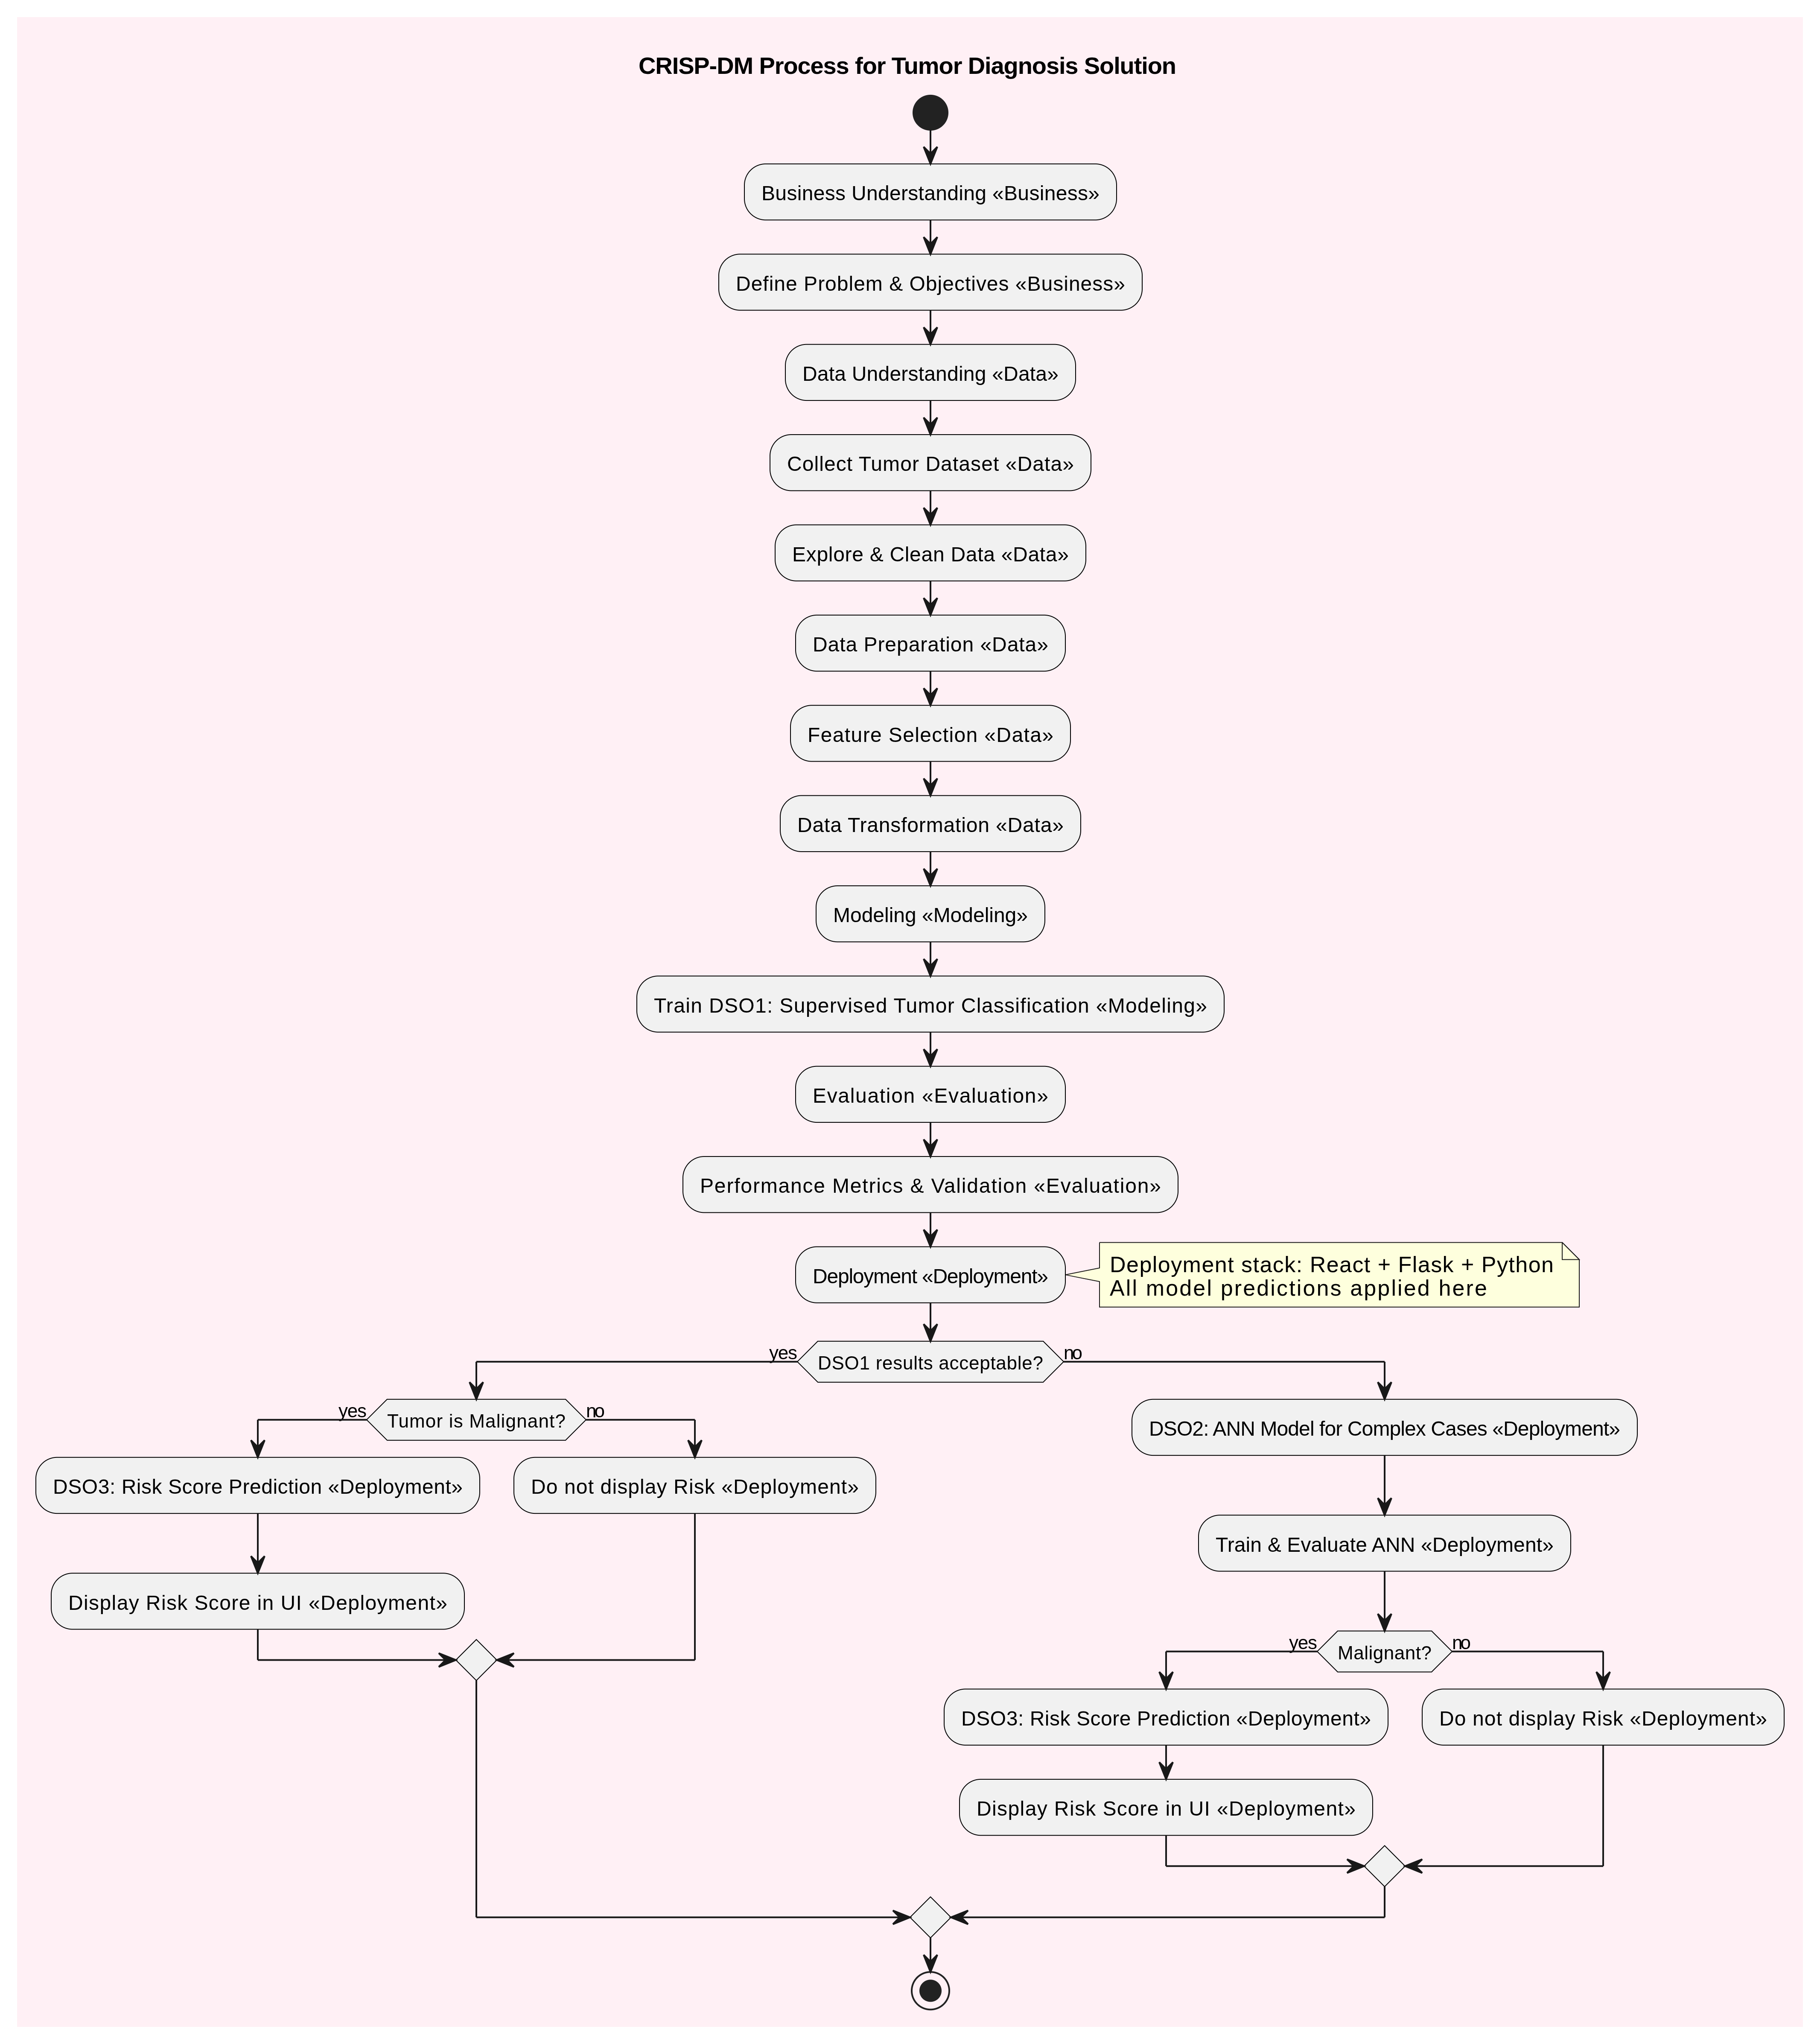![image.png]()